In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

# reading features list



In [2]:
# reading features list
with open("E:\KDD\kddcup.names", 'r') as f:
    print(f.read())

back,buffer_overflow,ftp_write,guess_passwd,imap,ipsweep,land,loadmodule,multihop,neptune,nmap,normal,perl,phf,pod,portsweep,rootkit,satan,smurf,spy,teardrop,warezclient,warezmaster.
duration: continuous.
protocol_type: symbolic.
service: symbolic.
flag: symbolic.
src_bytes: continuous.
dst_bytes: continuous.
land: symbolic.
wrong_fragment: continuous.
urgent: continuous.
hot: continuous.
num_failed_logins: continuous.
logged_in: symbolic.
num_compromised: continuous.
root_shell: continuous.
su_attempted: continuous.
num_root: continuous.
num_file_creations: continuous.
num_shells: continuous.
num_access_files: continuous.
num_outbound_cmds: continuous.
is_host_login: symbolic.
is_guest_login: symbolic.
count: continuous.
srv_count: continuous.
serror_rate: continuous.
srv_serror_rate: continuous.
rerror_rate: continuous.
srv_rerror_rate: continuous.
same_srv_rate: continuous.
diff_srv_rate: continuous.
srv_diff_host_rate: continuous.
dst_host_count: continuous.
dst_host_srv_count: con

In [3]:
# Append columns to the dataset and add ‘target’ column.
cols ="""duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins, 
logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,
is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,
srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,
dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate"""

columns =[]
for c in cols.split(','):
    if(c.strip()):
       columns.append(c.strip())
  
columns.append('target')
print(len(columns))

42


In [4]:
df = pd.read_csv(r"E:\KDD\training_attack_types")
print(df)

               back dos
0   buffer_overflow u2r
1         ftp_write r2l
2      guess_passwd r2l
3              imap r2l
4         ipsweep probe
5              land dos
6        loadmodule u2r
7          multihop r2l
8           neptune dos
9            nmap probe
10             perl u2r
11              phf r2l
12              pod dos
13      portsweep probe
14          rootkit u2r
15          satan probe
16            smurf dos
17              spy r2l
18         teardrop dos
19      warezclient r2l
20      warezmaster r2l


In [5]:
#Create dictionary of training_attack_types 

attacks_types = {
    'normal': 'normal',
    'back': 'dos',
    'buffer_overflow': 'u2r',
    'ftp_write': 'r2l',
    'guess_passwd': 'r2l',
    'imap': 'r2l',
    'ipsweep': 'probe',
    'land': 'dos',
    'loadmodule': 'u2r',
    'multihop': 'r2l',
    'neptune': 'dos',
    'nmap': 'probe',
    'perl': 'u2r',
    'phf': 'r2l',
    'pod': 'dos',
    'portsweep': 'probe',
    'rootkit': 'u2r',
    'satan': 'probe',
    'smurf': 'dos',
    'spy': 'r2l',
    'teardrop': 'dos',
    'warezclient': 'r2l',
    'warezmaster': 'r2l',
}

In [6]:
# Read in the full KDD 1999 dataset (10% subset also available)
path = "E:\KDD\kddcup.data_10_percent.gz"
kdd_df = pd.read_csv(path, names = columns)

In [7]:
# Add Attack Type column to DataFrame
kdd_df['Attack_Type'] = kdd_df.target.apply(lambda r:attacks_types[r[:-1]])
kdd_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack_Type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,normal


In [8]:
# Datframe info, ~4.9 million entries 
kdd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494021 non-null  int64  
 1   protocol_type                494021 non-null  object 
 2   service                      494021 non-null  object 
 3   flag                         494021 non-null  object 
 4   src_bytes                    494021 non-null  int64  
 5   dst_bytes                    494021 non-null  int64  
 6   land                         494021 non-null  int64  
 7   wrong_fragment               494021 non-null  int64  
 8   urgent                       494021 non-null  int64  
 9   hot                          494021 non-null  int64  
 10  num_failed_logins            494021 non-null  int64  
 11  logged_in                    494021 non-null  int64  
 12  num_compromised              494021 non-null  int64  
 13 

In [9]:
# Check missing for missing entries
kdd_df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

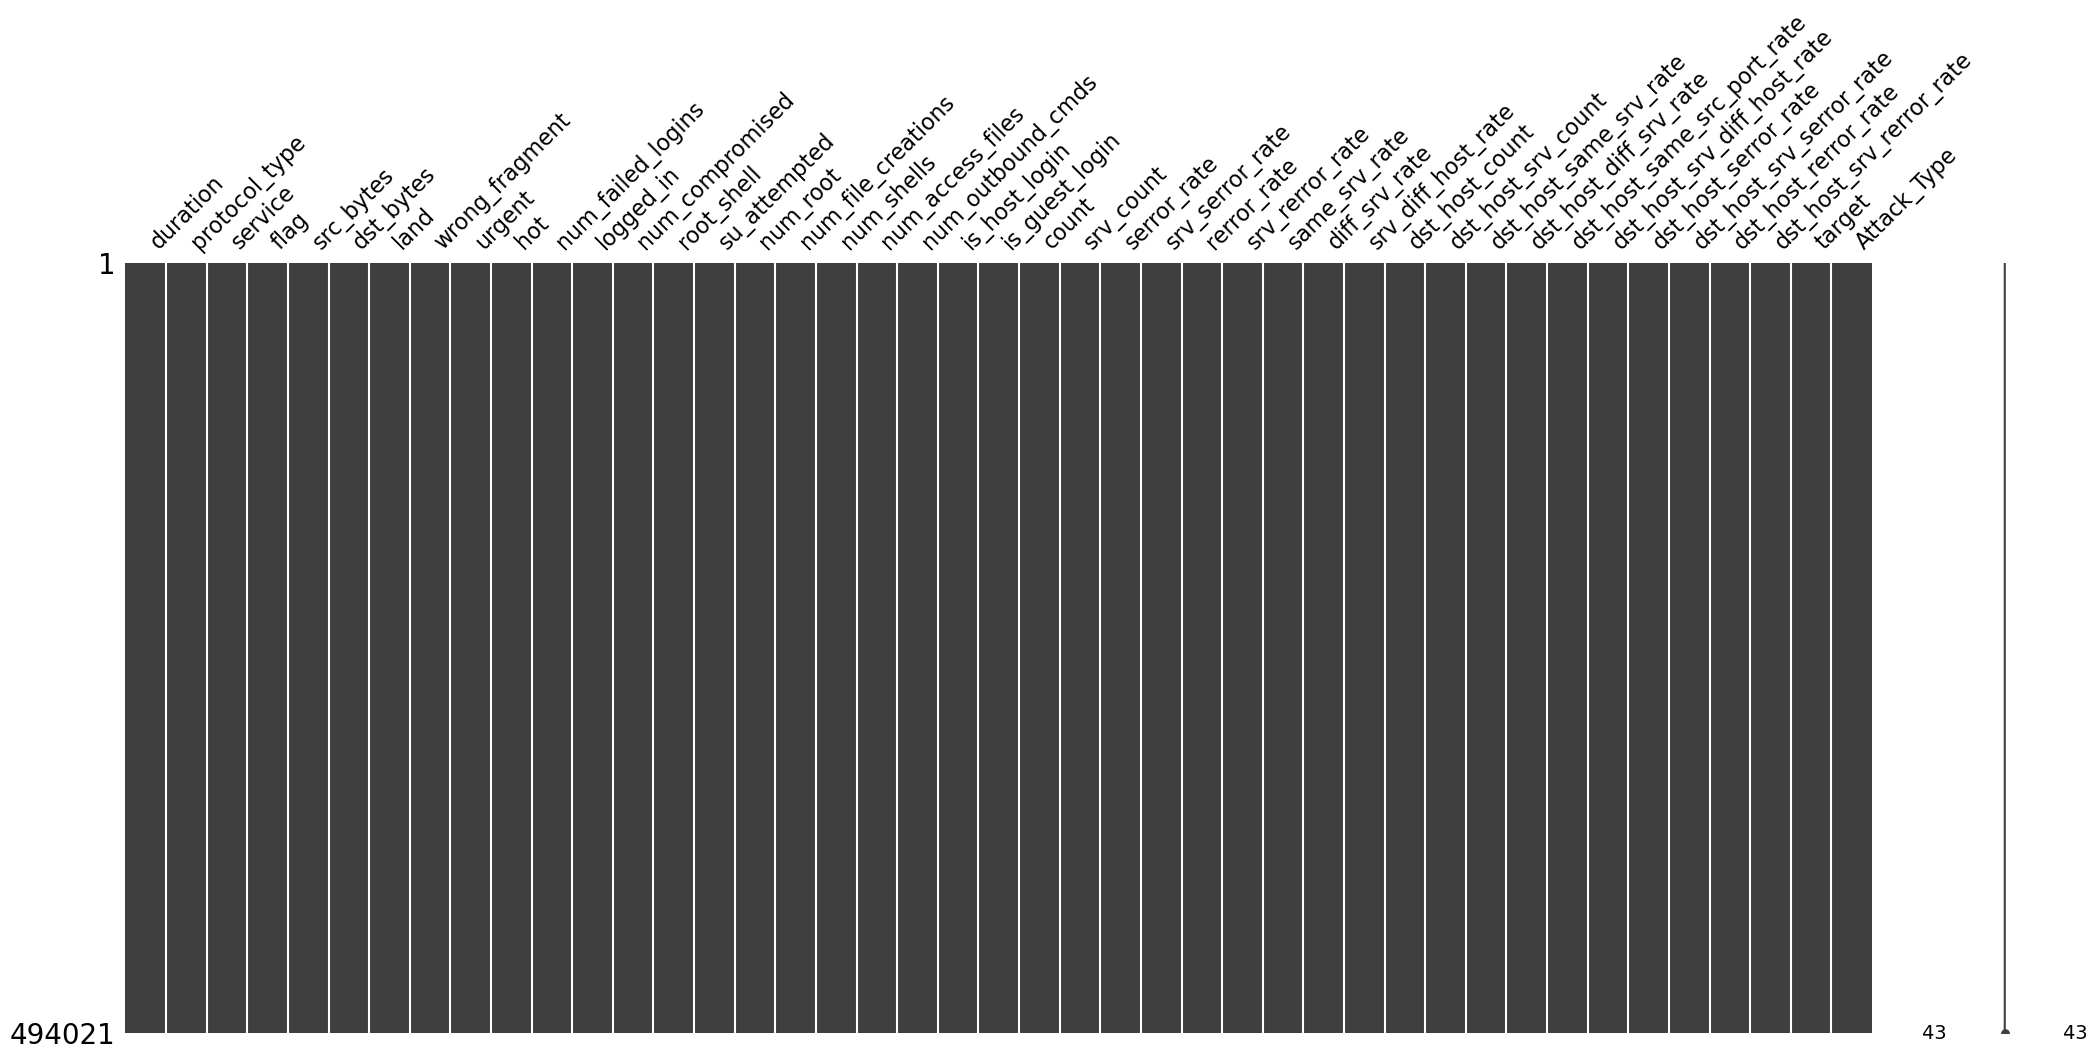

In [10]:
# Visualizing missing entries (none found)
import missingno as msno
msno.matrix(kdd_df)
plt.show()


In [11]:
kdd_df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'target', 'Attack_Type'],
      dtype='object')

In [12]:
kdd_df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,494021.000000,4.940210e+05,4.940210e+05,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,...,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000
mean,47.979302,3.025610e+03,8.685324e+02,0.000045,0.006433,0.000014,0.034519,0.000152,0.148247,0.010212,...,232.470778,188.665670,0.753780,0.030906,0.601935,0.006684,0.176754,0.176443,0.058118,0.057412
std,707.746472,9.882181e+05,3.304000e+04,0.006673,0.134805,0.005510,0.782103,0.015520,0.355345,1.798326,...,64.745380,106.040437,0.410781,0.109259,0.481309,0.042133,0.380593,0.380919,0.230590,0.230140
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.500000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,46.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.040000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,58329.000000,6.933756e+08,5.155468e+06,1.000000,3.000000,3.000000,30.000000,5.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
# Finding categorical features
numerical_cols = kdd_df._get_numeric_data().columns
  
categorical_cols = list(set(kdd_df.columns)-set(numerical_cols))
categorical_cols.remove('target')
categorical_cols.remove('Attack_Type')
  
categorical_cols

['service', 'protocol_type', 'flag']

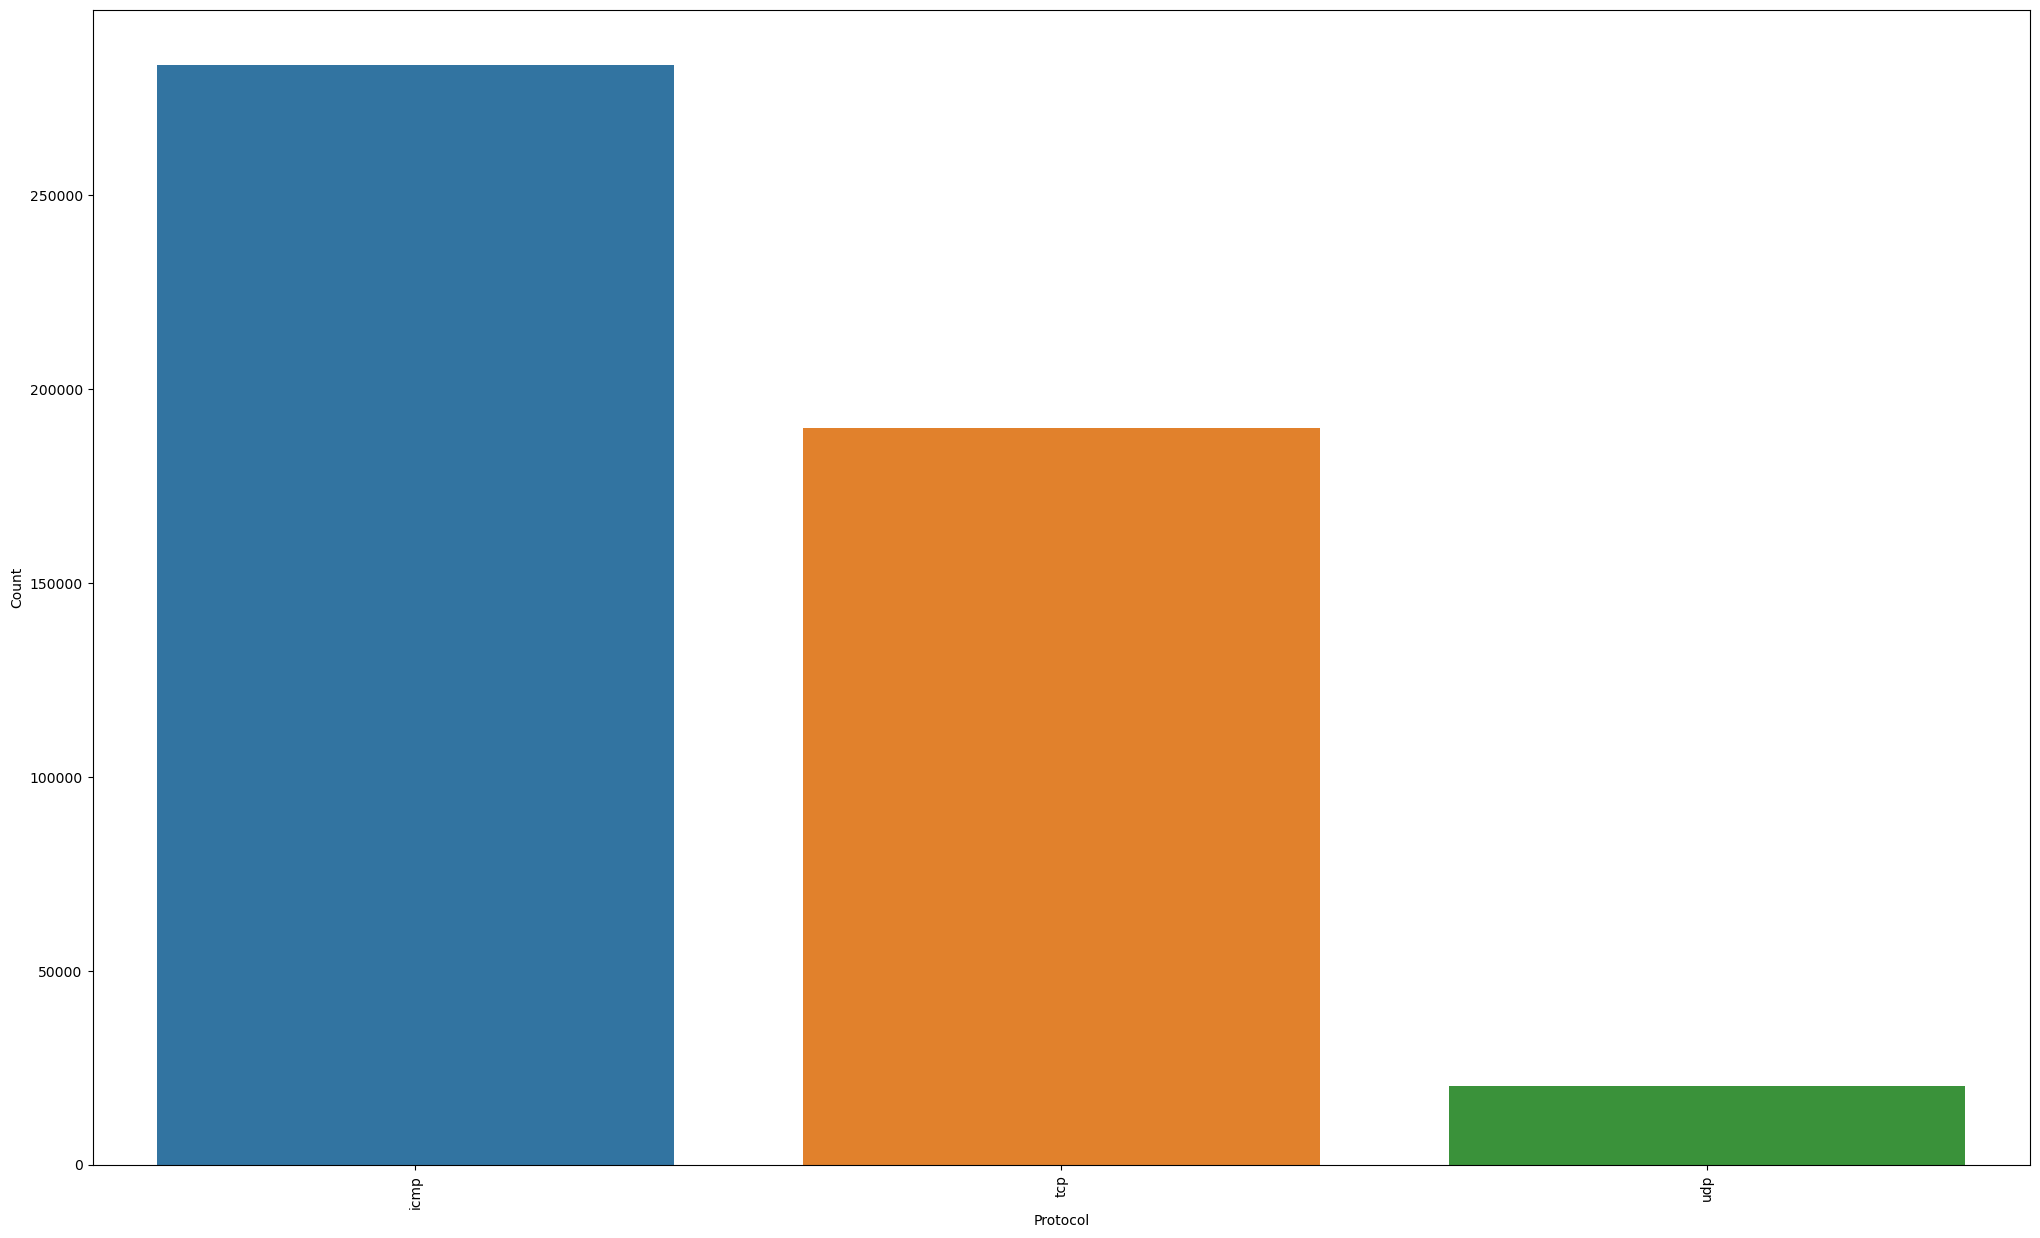

In [14]:
df2 = pd.DataFrame(columns = ['Protocol'])
df2['Protocol']=[each for each in kdd_df.protocol_type.unique()]
df2['Count']=[len(kdd_df[kdd_df.protocol_type==each]) for each in df2.Protocol]
df2=df2.sort_values(by=['Count'],ascending=False)

plt.figure(figsize=(25,15))
sns.barplot(x=df2.Protocol.head(50), y=df2.Count.head(50))
plt.xticks(rotation= 90)
plt.xlabel('Protocol')
plt.ylabel('Count')
plt.show()


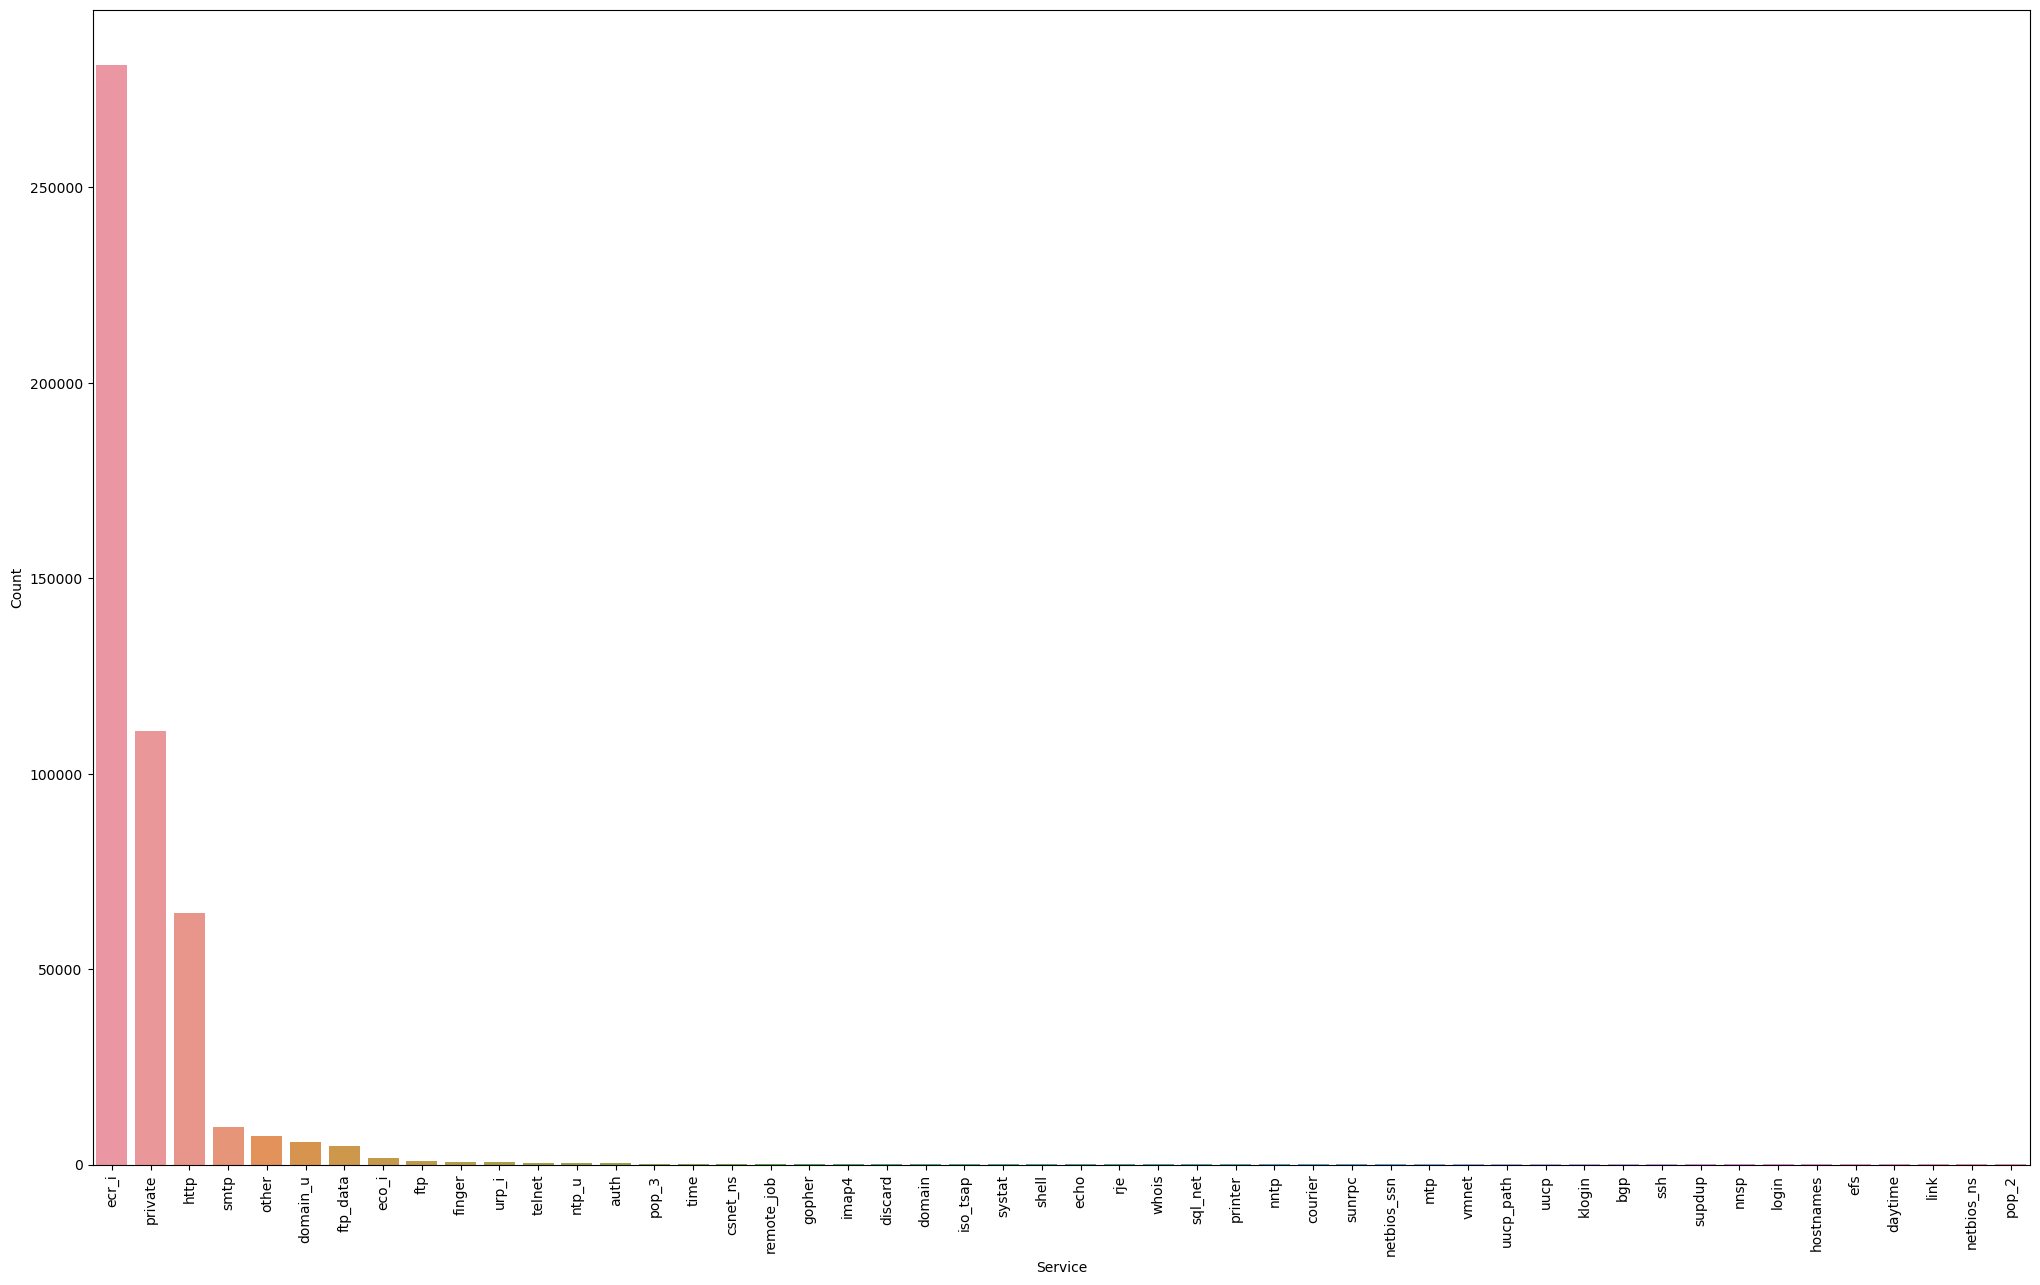

In [15]:
df3 = pd.DataFrame(columns = ['Service'])
df3['Service']=[each for each in kdd_df.service.unique()]
df3['Count']=[len(kdd_df[kdd_df.service==each]) for each in df3.Service]
df3=df3.sort_values(by=['Count'],ascending=False)

plt.figure(figsize=(25,15))
sns.barplot(x=df3.Service.head(50), y=df3.Count.head(50))
plt.xticks(rotation= 90)
plt.xlabel('Service')
plt.ylabel('Count')
plt.show()

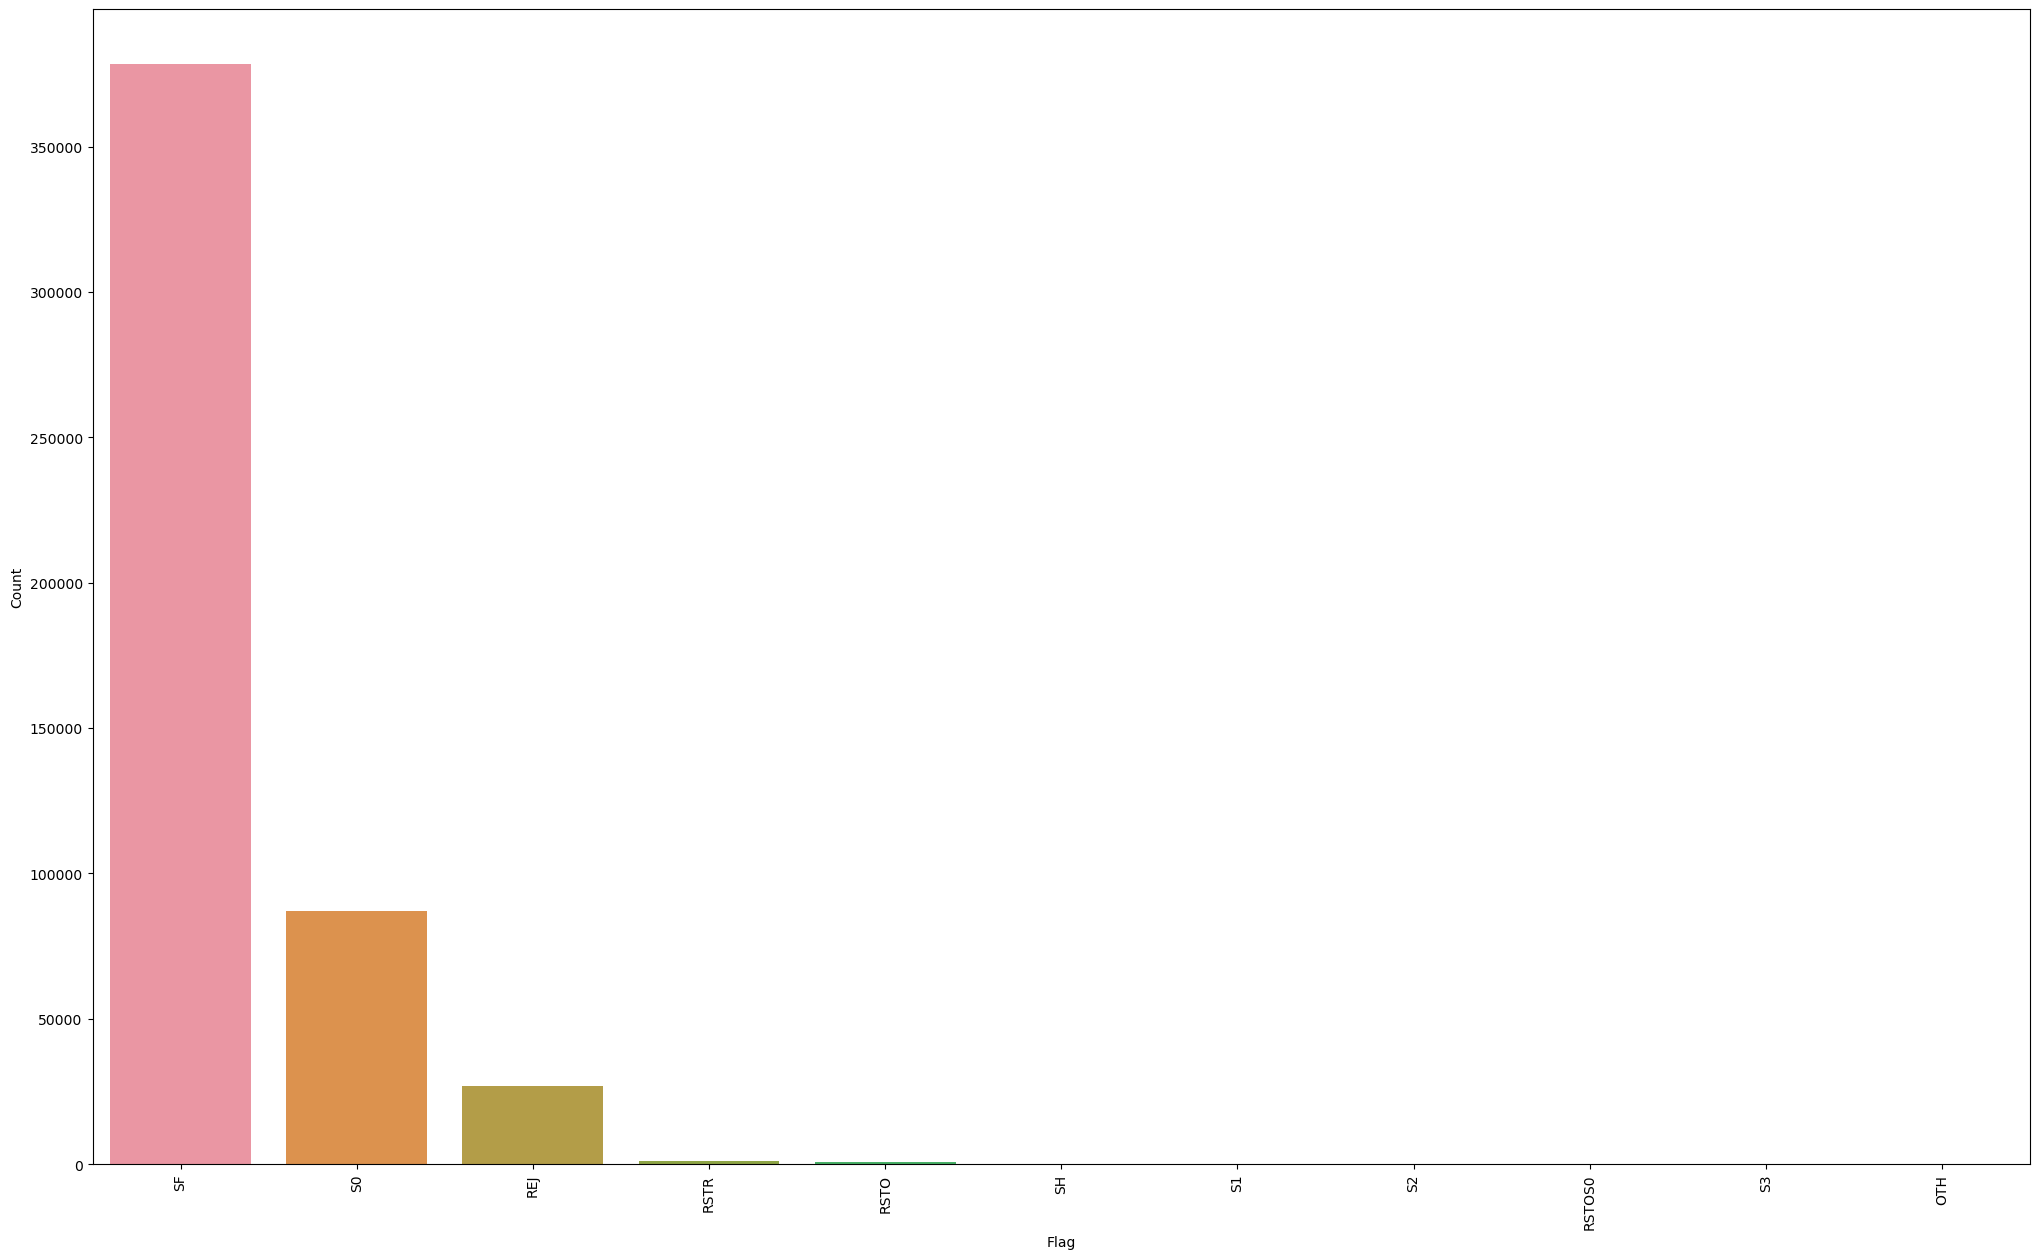

In [16]:
df4 = pd.DataFrame(columns = ['Flag'])
df4['Flag']=[each for each in kdd_df.flag.unique()]
df4['Count']=[len(kdd_df[kdd_df.flag==each]) for each in df4.Flag]
df4=df4.sort_values(by=['Count'],ascending=False)

plt.figure(figsize=(25,15))
sns.barplot(x=df4.Flag.head(50), y=df4.Count.head(50))
plt.xticks(rotation= 90)
plt.xlabel('Flag')
plt.ylabel('Count')
plt.show()

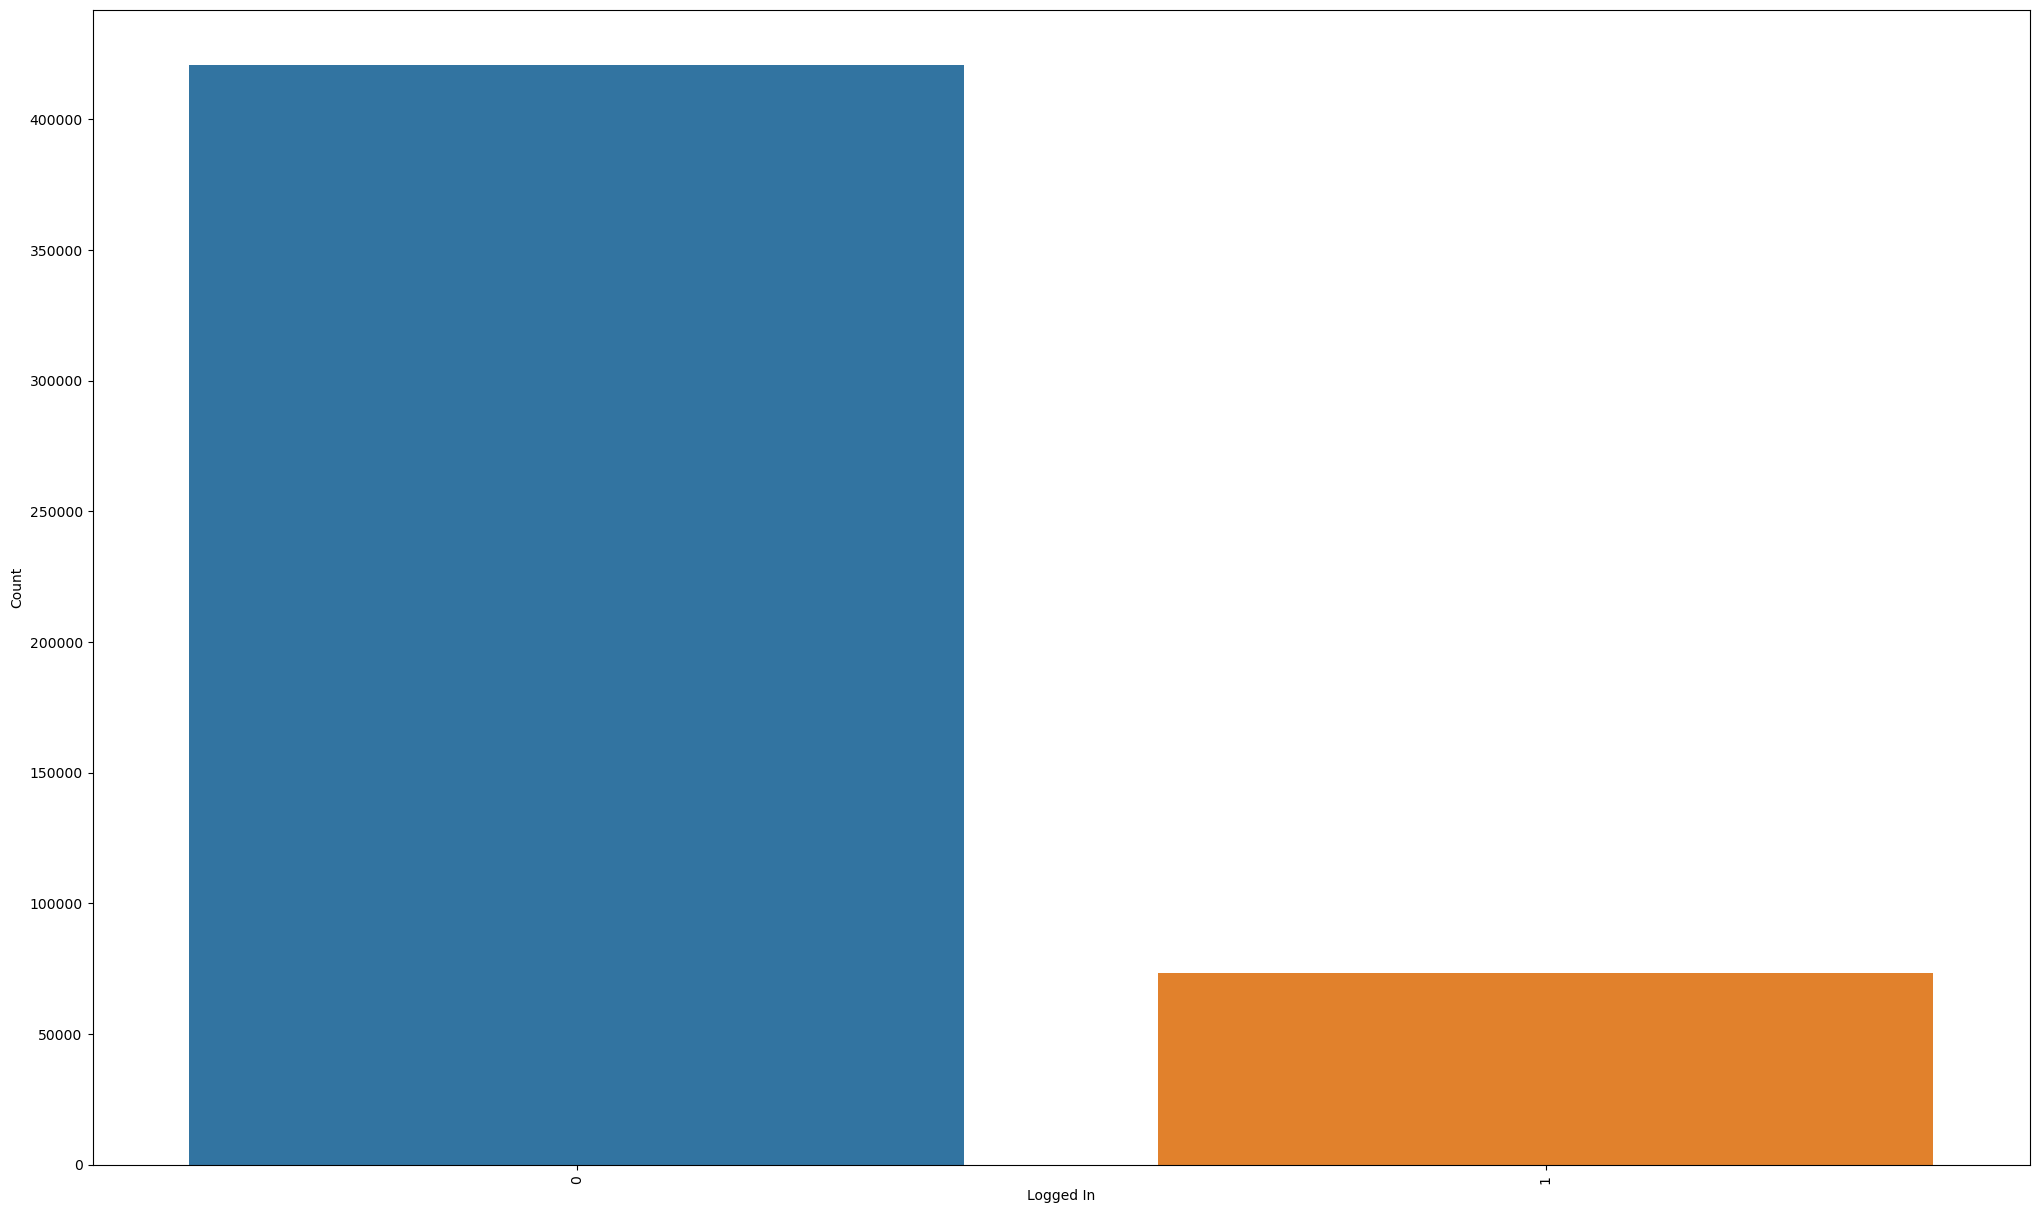

In [17]:
df5 = pd.DataFrame(columns = ['Logged_In'])
df5['Logged_In']=[each for each in kdd_df.logged_in.unique()]
df5['Count']=[len(kdd_df[kdd_df.logged_in==each]) for each in df5.Logged_In]
df5=df5.sort_values(by=['Count'],ascending=False)

plt.figure(figsize=(25,15))
sns.barplot(x=df5.Logged_In.head(50), y=df5.Count.head(50))
plt.xticks(rotation= 90)
plt.xlabel('Logged In')
plt.ylabel('Count')
plt.show()

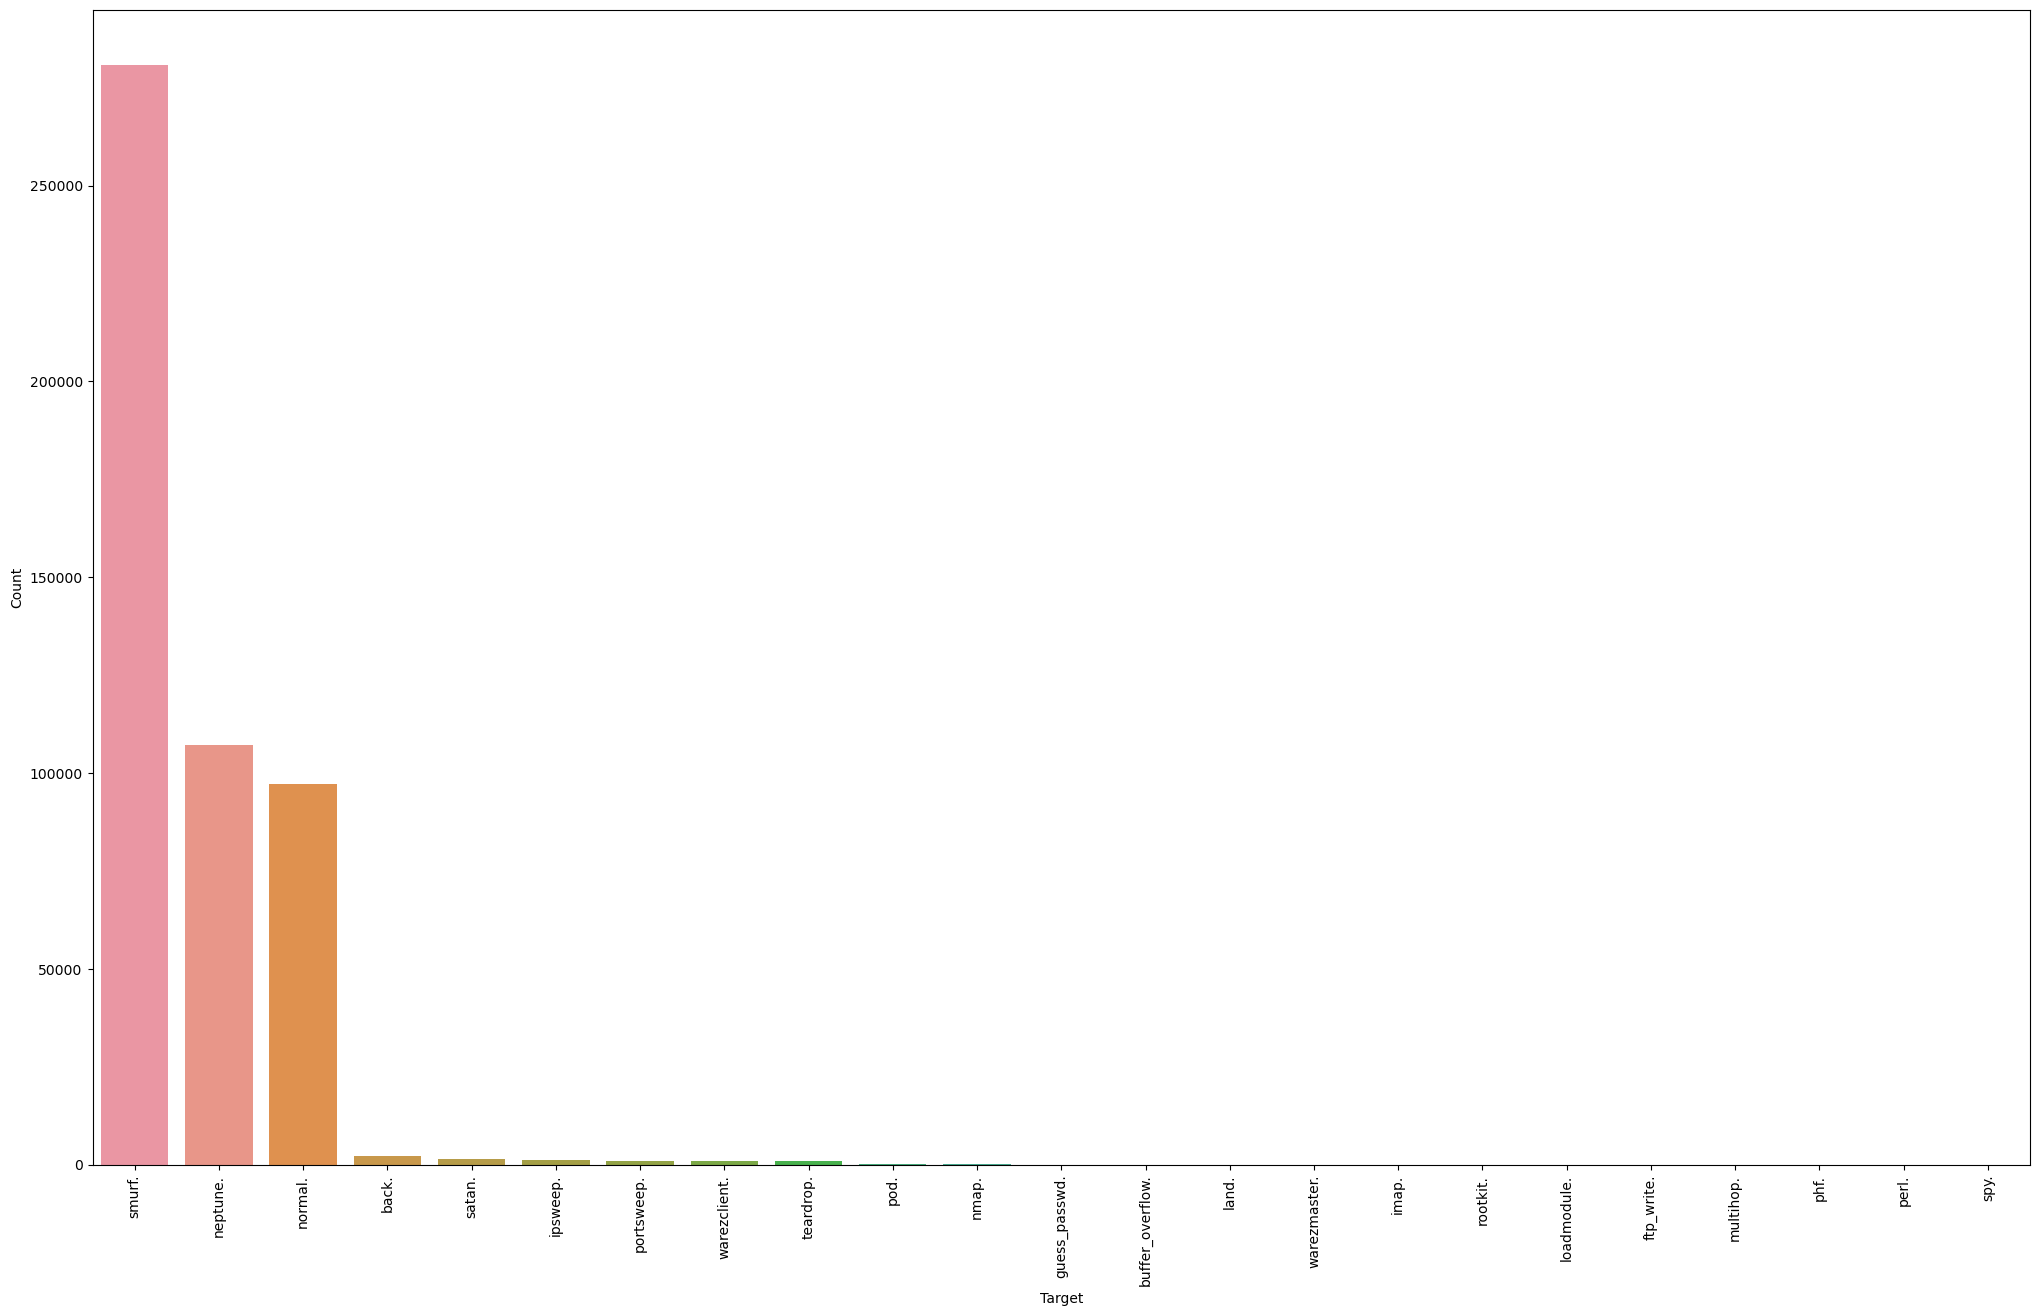

In [18]:
df6 = pd.DataFrame(columns = ['Target'])
df6['Target']=[each for each in kdd_df.target.unique()]
df6['Count']=[len(kdd_df[kdd_df.target==each]) for each in df6.Target]
df6=df6.sort_values(by=['Count'],ascending=False)

plt.figure(figsize=(25,15))
sns.barplot(x=df6.Target.head(50), y=df6.Count.head(50))
plt.xticks(rotation= 90)
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

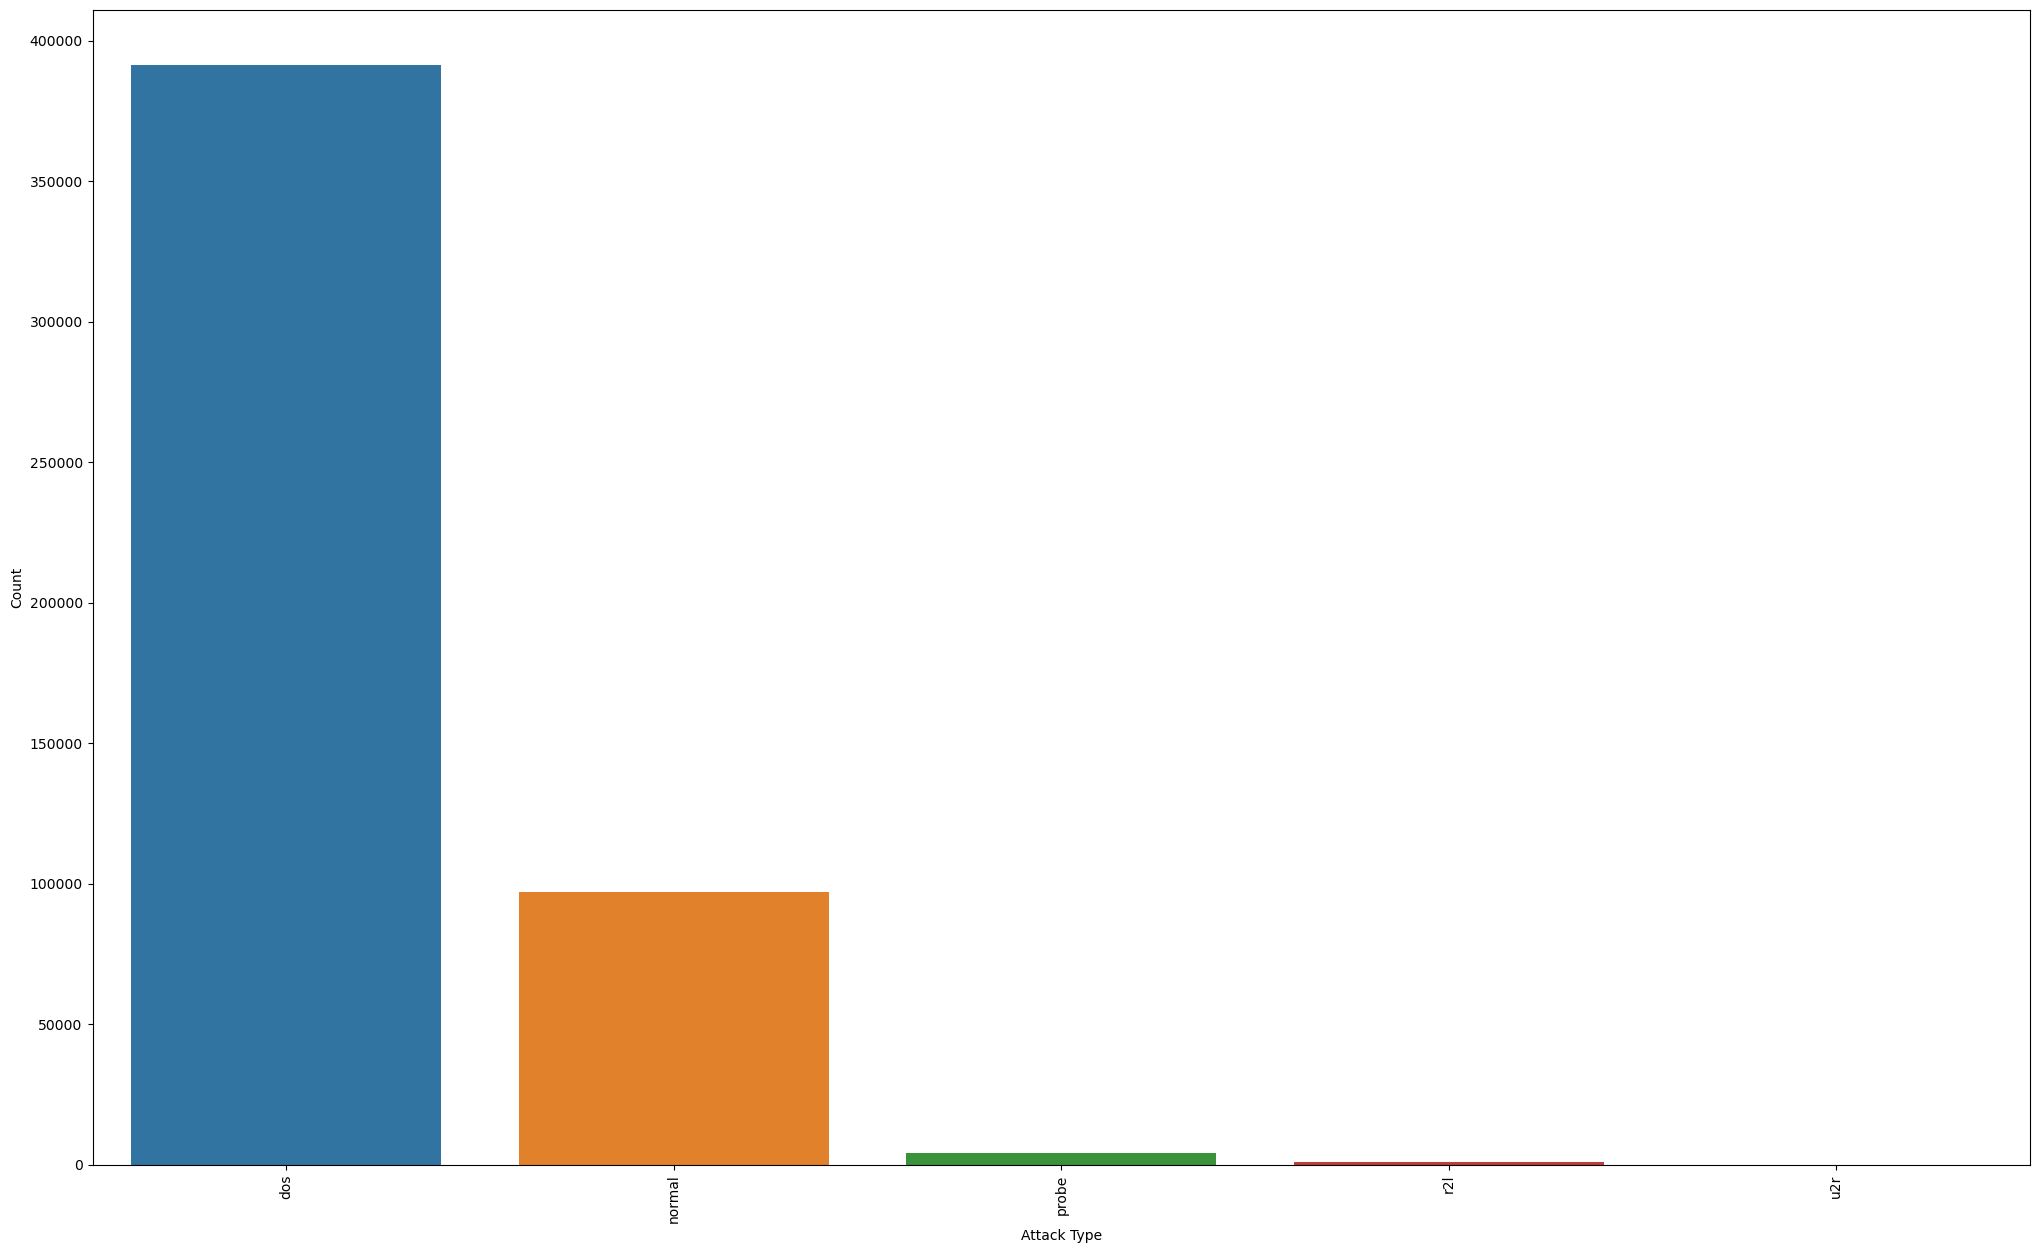

In [19]:
df7 = pd.DataFrame(columns = ['Attack_Type'])
df7['Attack_Type']=[each for each in kdd_df.Attack_Type.unique()]
df7['Count']=[len(kdd_df[kdd_df.Attack_Type==each]) for each in df7.Attack_Type]
df7=df7.sort_values(by=['Count'],ascending=False)

plt.figure(figsize=(25,15))
sns.barplot(x=df7.Attack_Type.head(50), y=df7.Count.head(50))
plt.xticks(rotation= 90)
plt.xlabel('Attack Type')
plt.ylabel('Count')
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21860\188459994.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  kdd_df = kdd_df.dropna('columns') # Drop columns with NaN
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21860\188459994.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = kdd_df.corr()


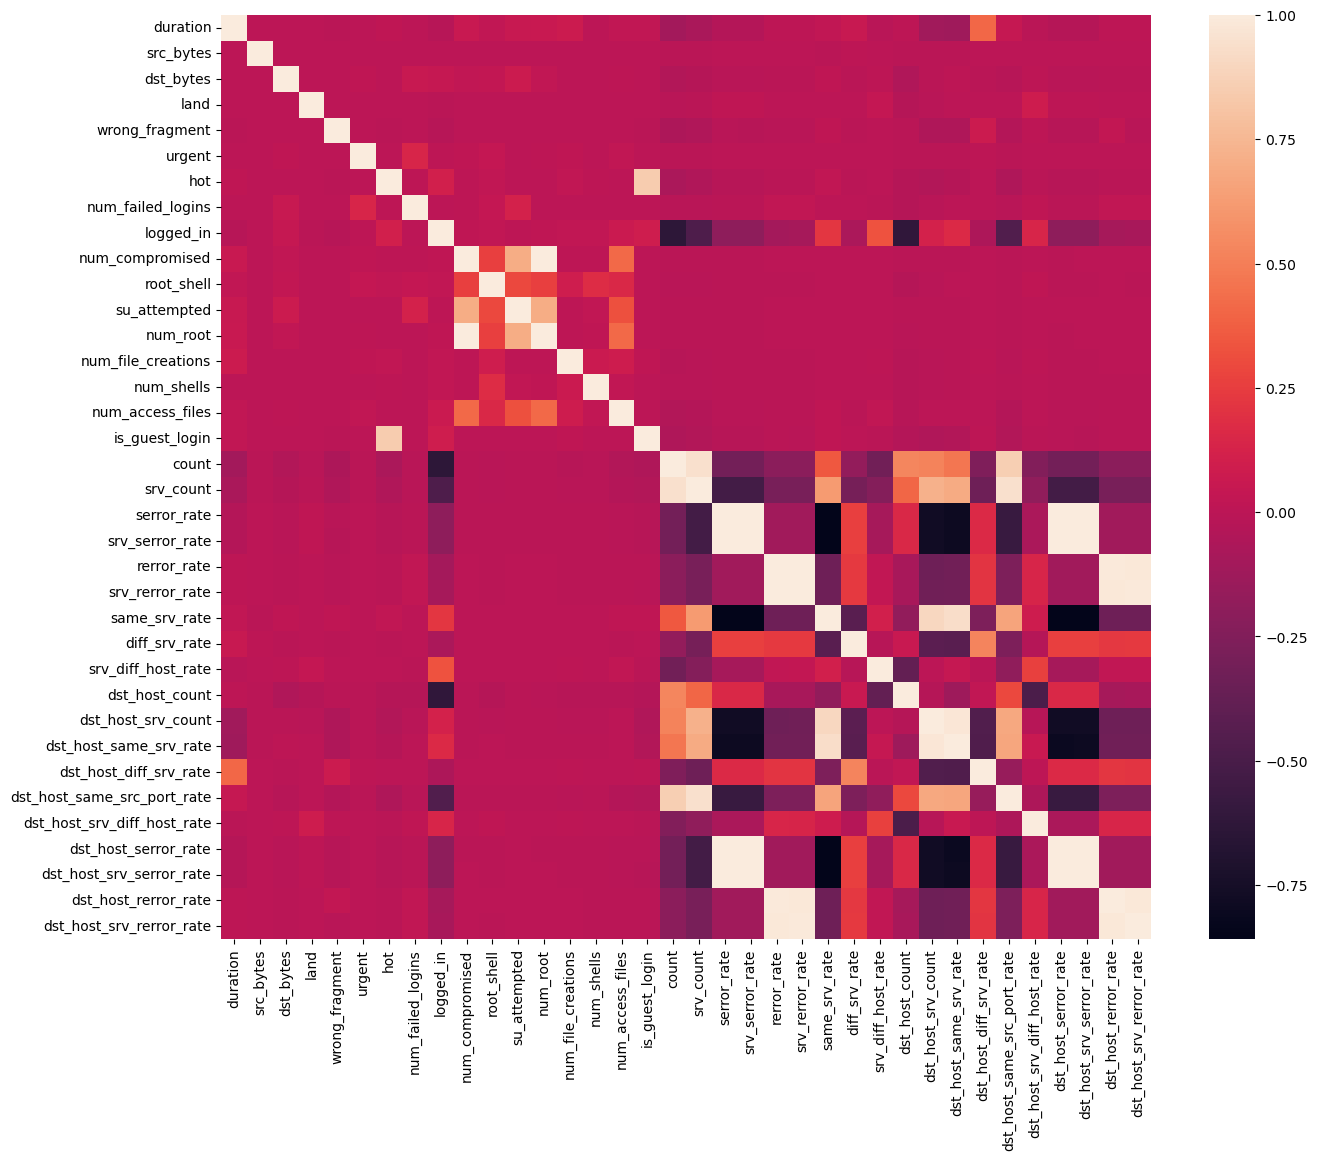

In [20]:
# Data Correlation – Find the highly correlated variables using heatmap and ignore them for analysis.

kdd_df = kdd_df.dropna('columns') # Drop columns with NaN

kdd_df = kdd_df[[col for col in kdd_df if kdd_df[col].nunique() > 1]] # Keep columns where there are more than 1 unique values

corr = kdd_df.corr()

plt.figure(figsize=(15,12))

sns.heatmap(corr)

plt.show()


In [21]:
kdd_df['num_root'].corr(kdd_df['num_compromised'])

0.9938277978738366

In [22]:
kdd_df['srv_serror_rate'].corr(kdd_df['serror_rate'])

0.9983615072725952

In [23]:
kdd_df['srv_count'].corr(kdd_df['count'])

0.9436670688882655

In [24]:
kdd_df['srv_rerror_rate'].corr(kdd_df['rerror_rate'])

0.9947309539817937

In [25]:
kdd_df['dst_host_same_srv_rate'].corr(kdd_df['dst_host_srv_count'])

0.9736854572953983

In [26]:
kdd_df['dst_host_srv_rerror_rate'].corr(kdd_df['dst_host_rerror_rate'])

0.9848038371110298

In [27]:
kdd_df['dst_host_same_srv_rate'].corr(kdd_df['same_srv_rate'])

0.9278080342691242

In [28]:
kdd_df['dst_host_srv_count'].corr(kdd_df['same_srv_rate'])

0.8989546630324209

In [29]:
kdd_df['dst_host_same_src_port_rate'].corr(kdd_df['srv_count'])

0.9449263676783333

In [30]:
kdd_df['dst_host_serror_rate'].corr(kdd_df['serror_rate'])

0.9986729680105015

In [31]:
kdd_df['dst_host_serror_rate'].corr(kdd_df['srv_serror_rate'])

0.997835300373975

In [32]:
kdd_df['dst_host_srv_serror_rate'].corr(kdd_df['serror_rate'])

0.9978492485680104

In [33]:
kdd_df['dst_host_srv_serror_rate'].corr(kdd_df['srv_serror_rate'])

0.9993041091850098

In [34]:
kdd_df['dst_host_rerror_rate'].corr(kdd_df['rerror_rate'])

0.9869947924956001

In [35]:
kdd_df['dst_host_rerror_rate'].corr(kdd_df['srv_rerror_rate'])

0.9821663427308375

In [36]:
kdd_df['dst_host_srv_rerror_rate'].corr(kdd_df['rerror_rate'])

0.9851995540751249

In [37]:
kdd_df['dst_host_srv_rerror_rate'].corr(kdd_df['srv_rerror_rate'])

0.9865705438845669

In [38]:
# Drop highly correlated variables as these should be ignored for learning
kdd_df.drop('num_root',axis = 1,inplace = True)
kdd_df.drop('srv_serror_rate',axis = 1,inplace = True)
kdd_df.drop('srv_rerror_rate',axis = 1, inplace=True)
kdd_df.drop('dst_host_srv_serror_rate',axis = 1, inplace=True)
kdd_df.drop('dst_host_serror_rate',axis = 1, inplace=True)
kdd_df.drop('dst_host_rerror_rate',axis = 1, inplace=True)
kdd_df.drop('dst_host_srv_rerror_rate',axis = 1, inplace=True)
kdd_df.drop('dst_host_same_srv_rate',axis = 1, inplace=True)

In [39]:
# Drop 'service' since provides no useful information for learning
kdd_df.drop('service',axis = 1, inplace=True)

In [40]:
kdd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Data columns (total 32 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494021 non-null  int64  
 1   protocol_type                494021 non-null  object 
 2   flag                         494021 non-null  object 
 3   src_bytes                    494021 non-null  int64  
 4   dst_bytes                    494021 non-null  int64  
 5   land                         494021 non-null  int64  
 6   wrong_fragment               494021 non-null  int64  
 7   urgent                       494021 non-null  int64  
 8   hot                          494021 non-null  int64  
 9   num_failed_logins            494021 non-null  int64  
 10  logged_in                    494021 non-null  int64  
 11  num_compromised              494021 non-null  int64  
 12  root_shell                   494021 non-null  int64  
 13 

In [41]:
kdd_df.head()

,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target,Attack_Type
0,0,tcp,SF,181,5450,0,0,0,0,0,...,1.0,0.0,0.0,9,9,0.0,0.11,0.0,normal.,normal
1,0,tcp,SF,239,486,0,0,0,0,0,...,1.0,0.0,0.0,19,19,0.0,0.05,0.0,normal.,normal
2,0,tcp,SF,235,1337,0,0,0,0,0,...,1.0,0.0,0.0,29,29,0.0,0.03,0.0,normal.,normal
3,0,tcp,SF,219,1337,0,0,0,0,0,...,1.0,0.0,0.0,39,39,0.0,0.03,0.0,normal.,normal
4,0,tcp,SF,217,2032,0,0,0,0,0,...,1.0,0.0,0.0,49,49,0.0,0.02,0.0,normal.,normal


In [42]:
# Feature Mapping
#protocol_type feature mapping
pmap = {'icmp':0,'tcp':1,'udp':2}
kdd_df['protocol_type'] = kdd_df['protocol_type'].map(pmap)

#flag feature mapping
fmap = {'SF':0,'S0':1,'REJ':2,'RSTR':3,'RSTO':4,'SH':5 ,'S1':6 ,'S2':7,'RSTOS0':8,'S3':9 ,'OTH':10}
kdd_df['flag'] = kdd_df['flag'].map(fmap)


In [43]:
kdd_df.head()

,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target,Attack_Type
0,0,1,0,181,5450,0,0,0,0,0,...,1.0,0.0,0.0,9,9,0.0,0.11,0.0,normal.,normal
1,0,1,0,239,486,0,0,0,0,0,...,1.0,0.0,0.0,19,19,0.0,0.05,0.0,normal.,normal
2,0,1,0,235,1337,0,0,0,0,0,...,1.0,0.0,0.0,29,29,0.0,0.03,0.0,normal.,normal
3,0,1,0,219,1337,0,0,0,0,0,...,1.0,0.0,0.0,39,39,0.0,0.03,0.0,normal.,normal
4,0,1,0,217,2032,0,0,0,0,0,...,1.0,0.0,0.0,49,49,0.0,0.02,0.0,normal.,normal


In [44]:
kdd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Data columns (total 32 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494021 non-null  int64  
 1   protocol_type                494021 non-null  int64  
 2   flag                         494021 non-null  int64  
 3   src_bytes                    494021 non-null  int64  
 4   dst_bytes                    494021 non-null  int64  
 5   land                         494021 non-null  int64  
 6   wrong_fragment               494021 non-null  int64  
 7   urgent                       494021 non-null  int64  
 8   hot                          494021 non-null  int64  
 9   num_failed_logins            494021 non-null  int64  
 10  logged_in                    494021 non-null  int64  
 11  num_compromised              494021 non-null  int64  
 12  root_shell                   494021 non-null  int64  
 13 

In [64]:
# Import sklearn modelling tools 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [46]:
# Split the dataset
print(kdd_df.columns )


Index(['duration', 'protocol_type', 'flag', 'src_bytes', 'dst_bytes', 'land',
       'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in',
       'num_compromised', 'root_shell', 'su_attempted', 'num_file_creations',
       'num_shells', 'num_access_files', 'is_guest_login', 'count',
       'srv_count', 'serror_rate', 'rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'target',
       'Attack_Type'],
      dtype='object')


In [67]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

In [68]:
# Split the dataset
kdd_df = kdd_df.drop(['target', ], axis = 1)
print(kdd_df.shape)


(494021, 31)


In [69]:
min_max_sc = MinMaxScaler() # Transform features by scaling each feature (ranfge = (0,1))
X = min_max_sc.fit_transform(X)


ValueError: could not convert string to float: 'normal.'

In [70]:
# Split between target variable and train set
y = kdd_df[['Attack_Type']]
X = kdd_df.drop(['Attack_Type', ], axis = 1)
scaler = StandardScaler()
scaler.fit(X)
X1 = scaler.transform(X)

In [61]:
print(y.columns )

Index(['Attack_Type'], dtype='object')


In [71]:
min_max_sc = MinMaxScaler() # Transform features by scaling each feature (ranfge = (0,1))
X = min_max_sc.fit_transform(X)


In [72]:
# Split dataset between training and testing set (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)


(395216, 30) (98805, 30)
(395216, 1) (98805, 1)


In [73]:
# Gaussian Naive Bayes Model
# GaussianNB implements the Gaussian Naive Bayes algorithm for classification. The likelihood of the features is assumed to be Gaussian
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()


In [74]:
# Training GNB
start_time = time.time()
gnb.fit(X_train, y_train.values.ravel())
end_time = time.time()
print("Training time: ", end_time-start_time)

Training time:  1.2600572109222412


In [75]:
#Testing GNB
start_time = time.time()
y_test_pred = gnb.predict(X_train)
end_time = time.time()
print("Testing time: ", end_time-start_time)


Testing time:  2.387972116470337


In [76]:
# GNB test and train scores
print("Train score is:", gnb.score(X_train, y_train))
print("Test score is:", gnb.score(X_test, y_test))

Train score is: 0.8812295048783451
Test score is: 0.8810181670968068


In [77]:
# Logistic Regression
# Fits a linear model with coefficients  to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter = 1200000)


In [78]:
# Training LR
start_time = time.time()
lr.fit(X_train, y_train.values.ravel())
end_time = time.time()
print("Training time: ", end_time-start_time)

Training time:  100.64204549789429


In [80]:
# Testing LR
start_time = time.time()
y_test_pred = lr.predict(X_train)
end_time = time.time()
print("Testing time: ", end_time-start_time)


Testing time:  0.17217564582824707


In [81]:
#LR test and train scores
print("Train score is:", lr.score(X_train, y_train))
print("Test score is:", lr.score(X_test, y_test))

Train score is: 0.9940918383871098
Test score is: 0.9941399726734477


In [82]:
# Decision Tree Classifier Model
# DecisionTreeClassifier is a class capable of performing multi-class classification on a dataset
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion ="entropy", max_depth = 4)

In [83]:
# Training DTC
start_time = time.time()
dtc.fit(X_train, y_train.values.ravel())
end_time = time.time()
print("Training time: ", end_time-start_time)


Training time:  6.418023347854614


In [84]:
# Testing DTC
start_time = time.time()
y_test_pred = dtc.predict(X_train)
end_time = time.time()
print("Testing time: ", end_time-start_time)

Testing time:  0.2741549015045166


In [85]:
# DTC test and train scores
print("Train score is:", dtc.score(X_train, y_train))
print("Test score is:", dtc.score(X_test, y_test))

Train score is: 0.9905747743006356
Test score is: 0.9905470370932645


In [86]:
# Random Forest Model
# A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.
from sklearn.ensemble import RandomForestClassifier
rfst = RandomForestClassifier(n_estimators = 30)


In [87]:
# Training RF
start_time = time.time()
rfst.fit(X_train, y_train.values.ravel())
end_time = time.time()
print("Training time: ", end_time-start_time)

Training time:  22.05630087852478


In [88]:
# Testing RF
start_time = time.time()
y_test_pred = rfst.predict(X_train)
end_time = time.time()
print("Testing time: ", end_time-start_time)

Testing time:  3.2770986557006836


In [89]:
# Rf test and train scores
print("Train score is:", rfst.score(X_train, y_train))
print("Test score is:", rfst.score(X_test, y_test))

Train score is: 0.9999797579045383
Test score is: 0.9996761297505187


In [103]:
names = ['GNB', 'DT', 'RF',  'LR']
values = [88.122, 99.057, 99.997, 99.409]


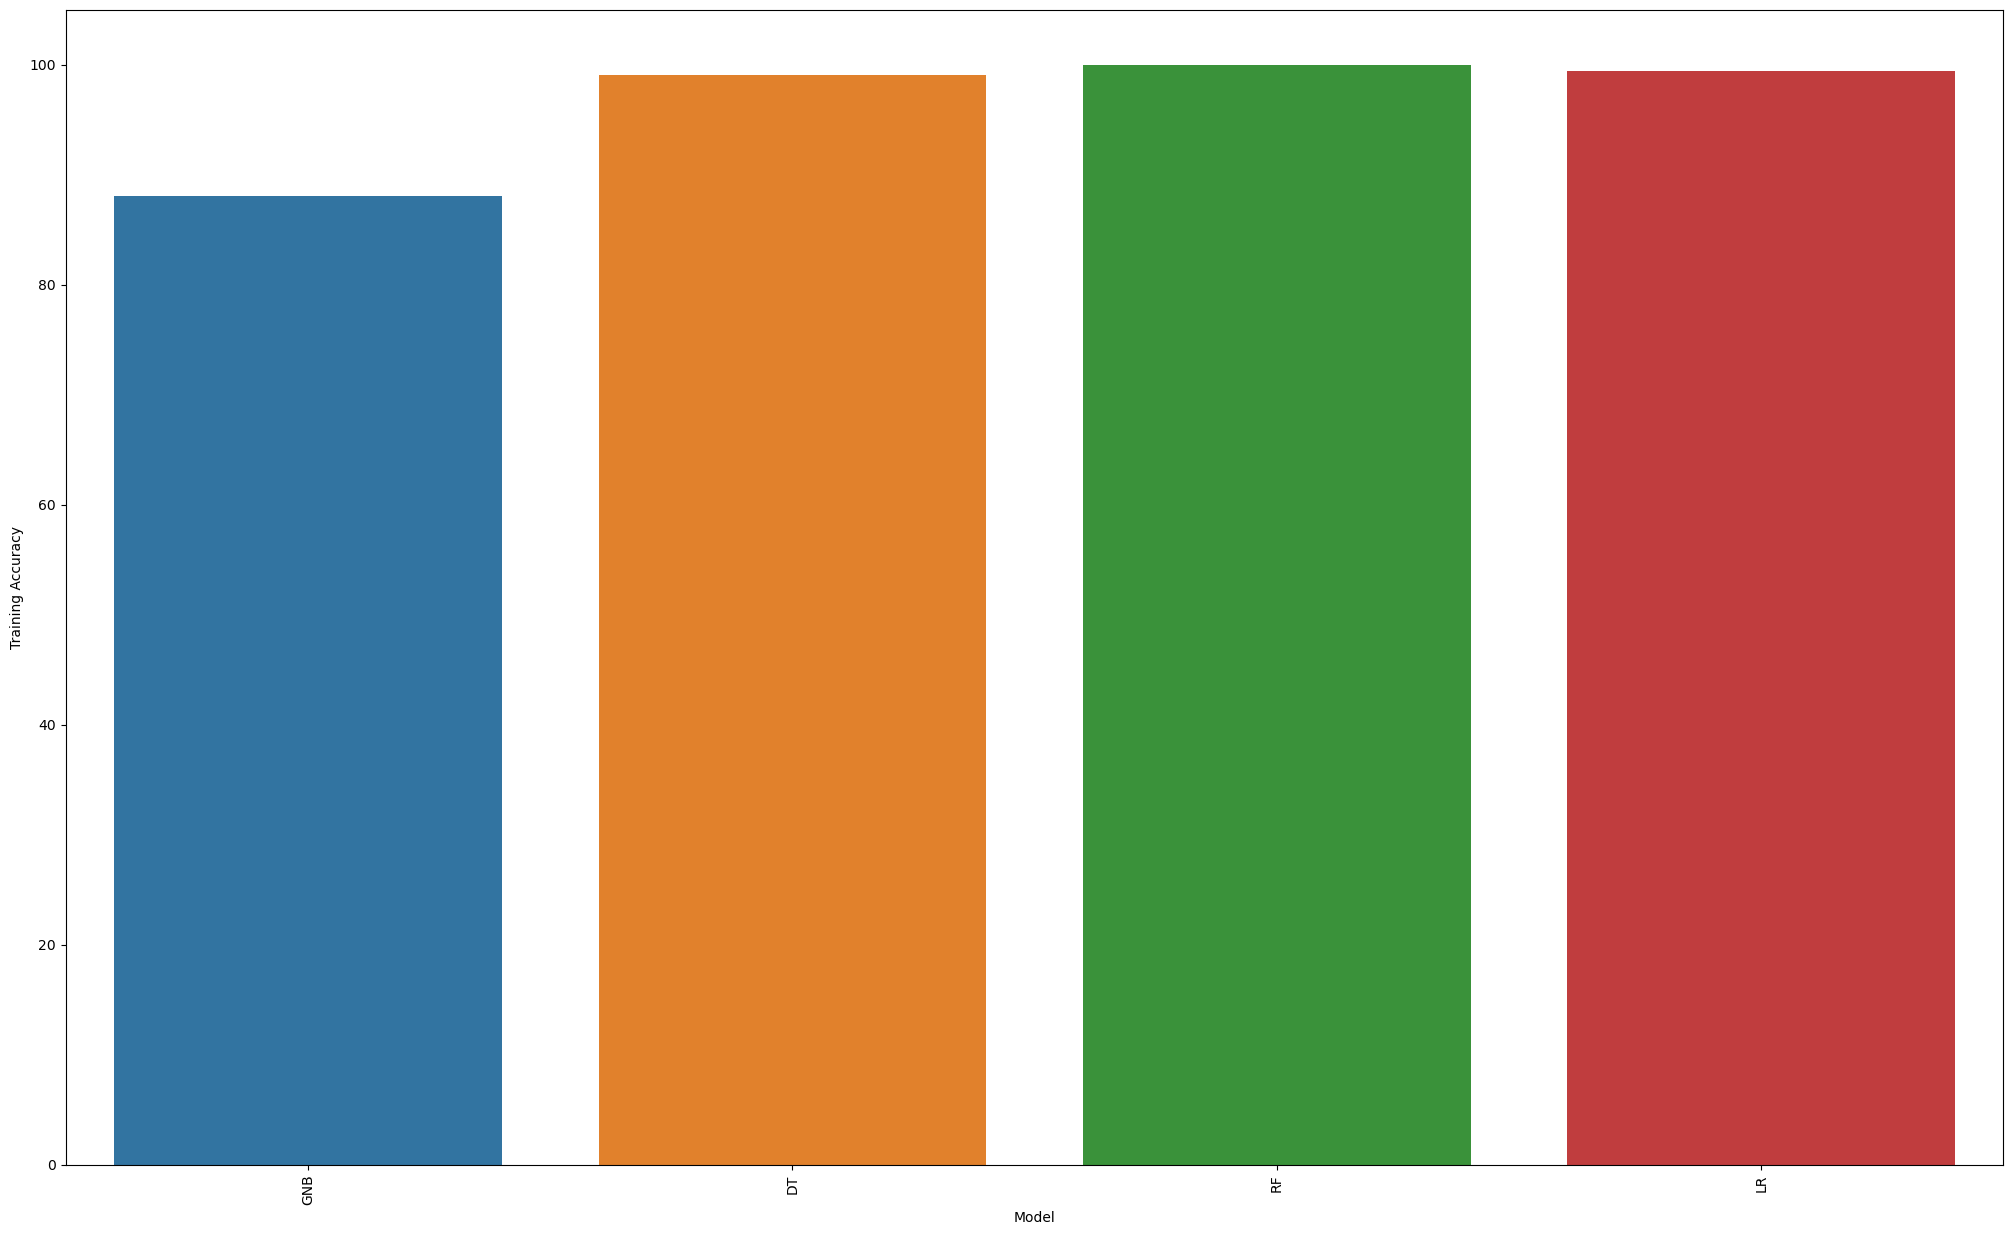

In [104]:
plt.figure(figsize=(25,15))
sns.barplot(x=names, y=values)
plt.xticks(rotation= 90)
plt.xlabel('Model')
plt.ylabel('Training Accuracy')
plt.show()


In [106]:
names = ['GNB', 'DT', 'RF',  'LR',]
values = [88.101, 99.054, 99.964,  99.413]


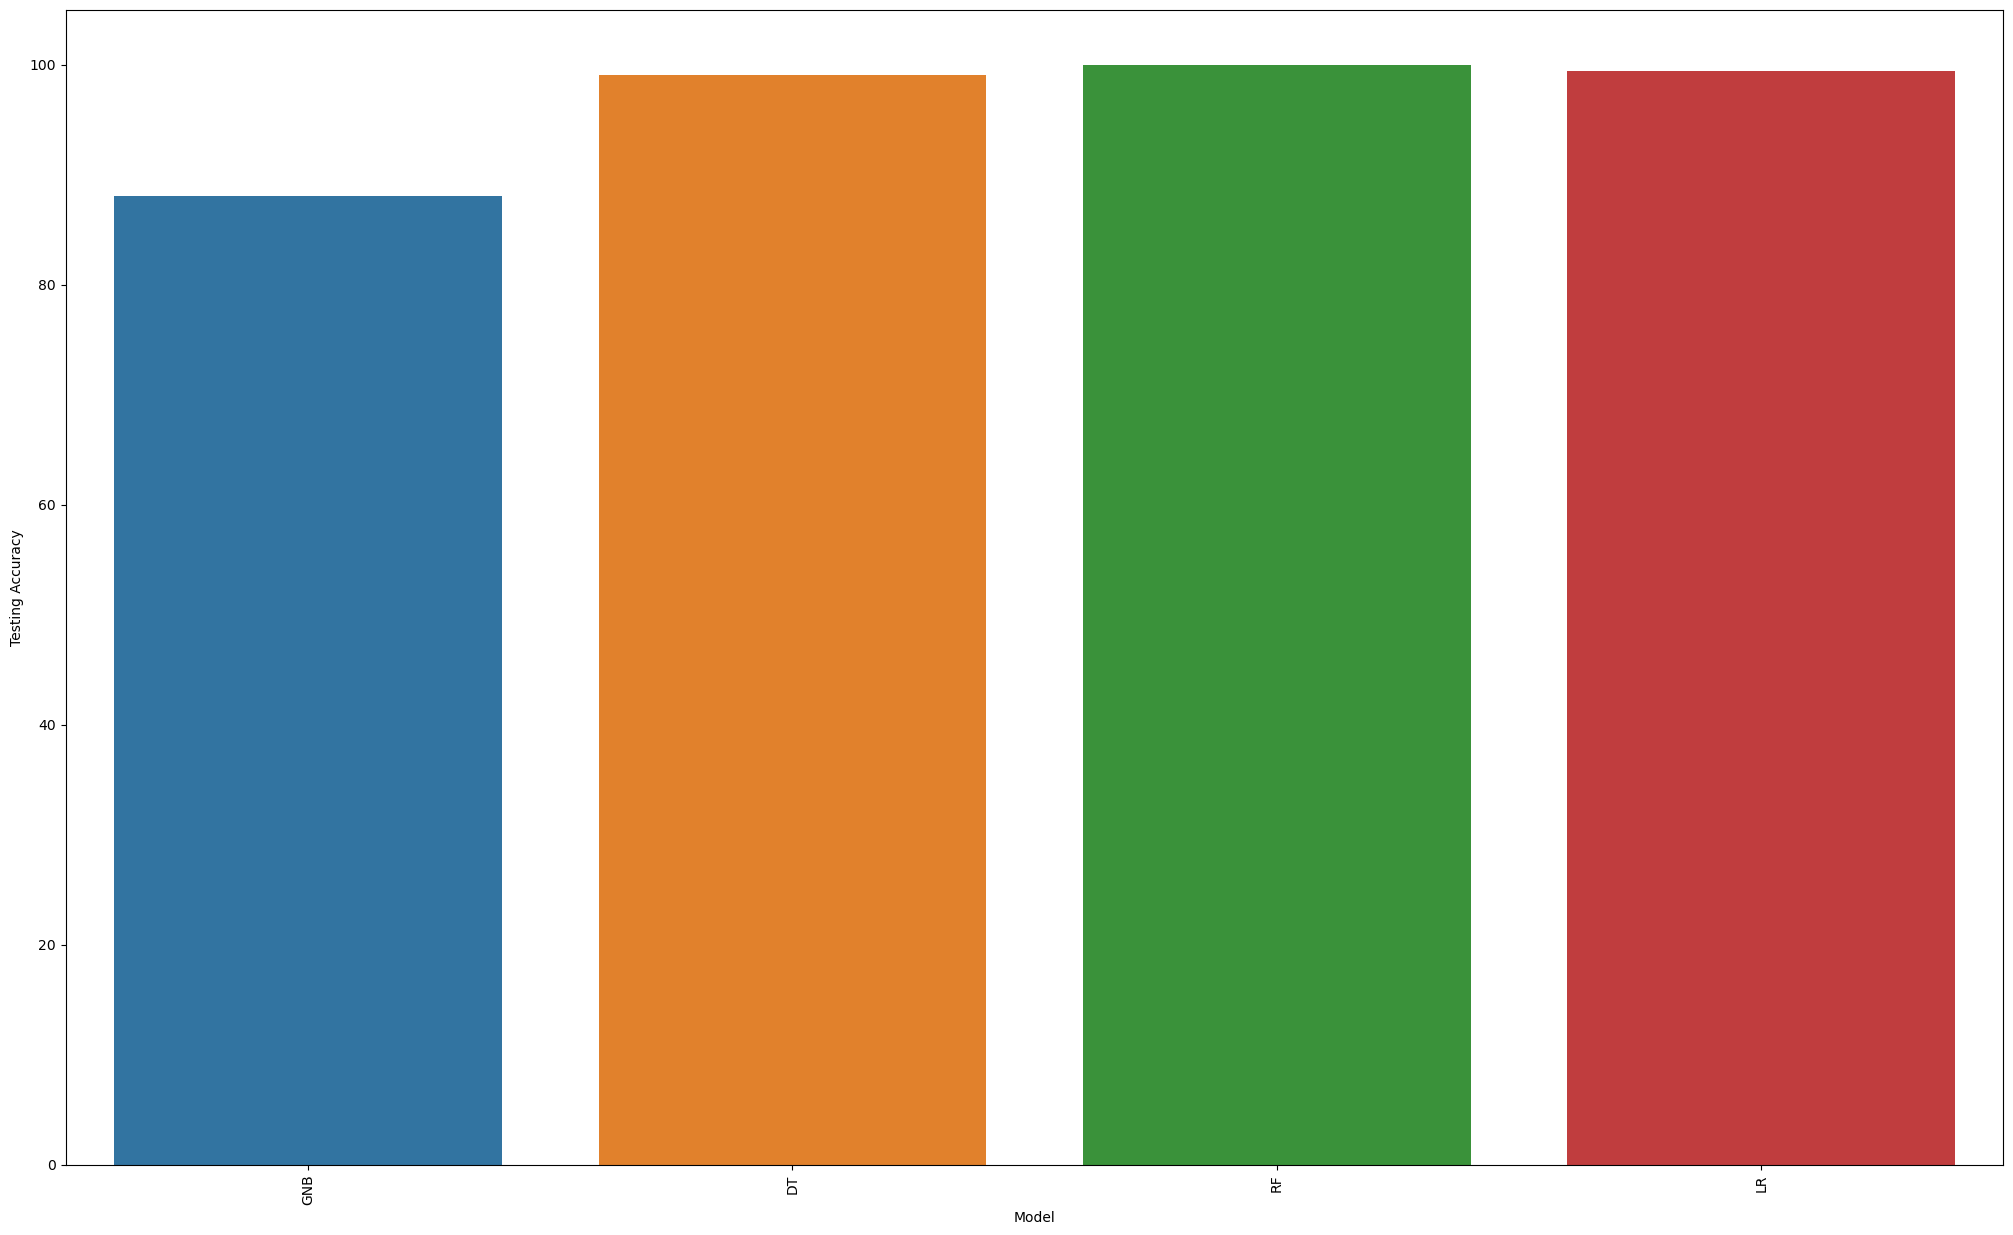

In [107]:
plt.figure(figsize=(25,15))
sns.barplot(x=names, y=values)
plt.xticks(rotation= 90)
plt.xlabel('Model')
plt.ylabel('Testing Accuracy')
plt.show()

In [113]:
names = ['GNB', 'DT', 'RF', 'LR']


values = [0.59927, 1.1712, 9.3125, 67.770]
                                       


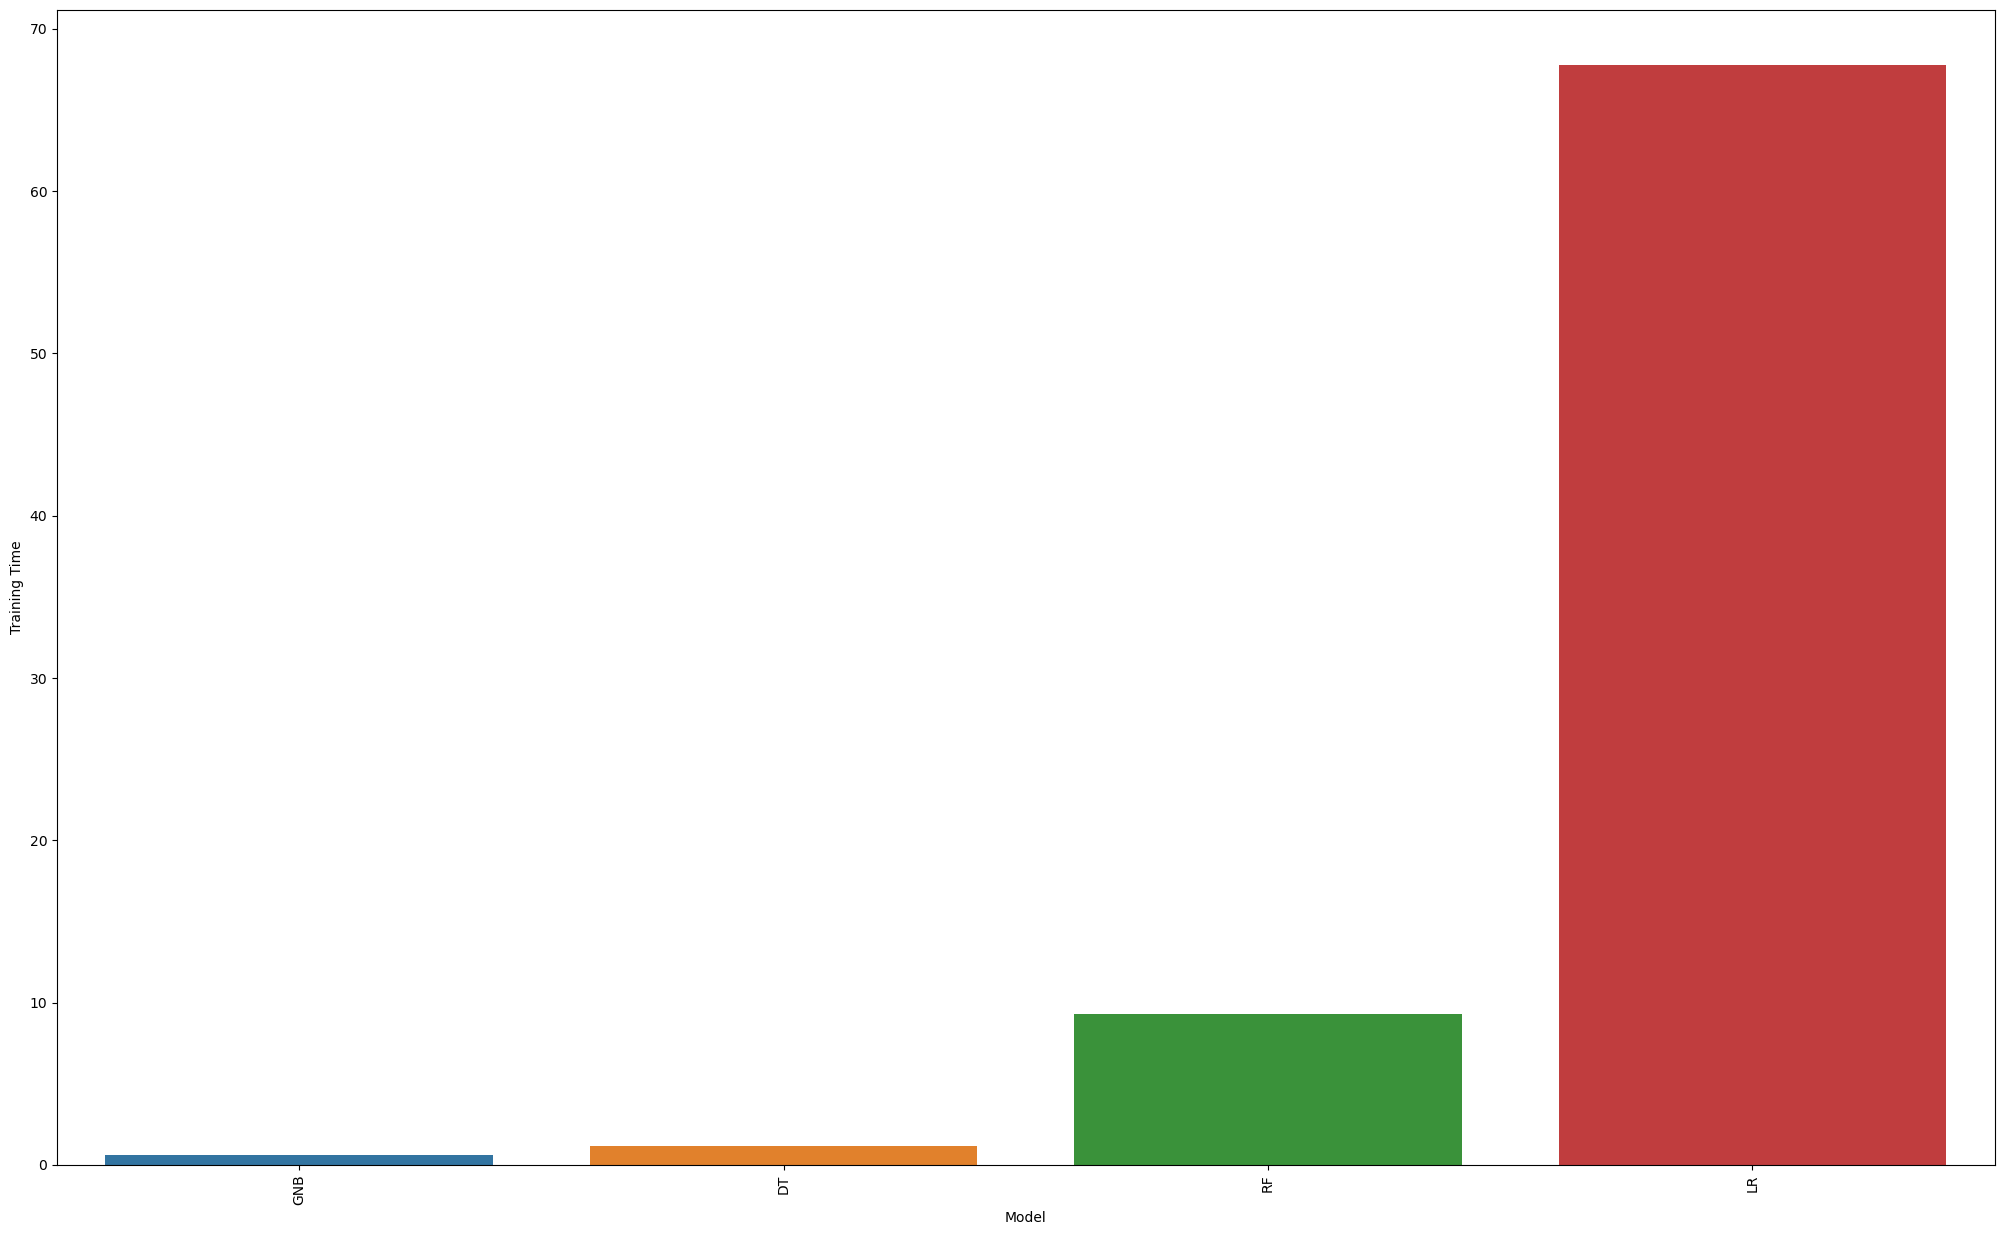

In [114]:
plt.figure(figsize=(25,15))
sns.barplot(x=names, y=values)
plt.xticks(rotation= 90)
plt.xlabel('Model')
plt.ylabel('Training Time')
plt.show()

In [115]:
names = ['GNB', 'DT', 'RF',  'LR']
values = [0.8810, 0.99054, 0.9996, 0.9941]


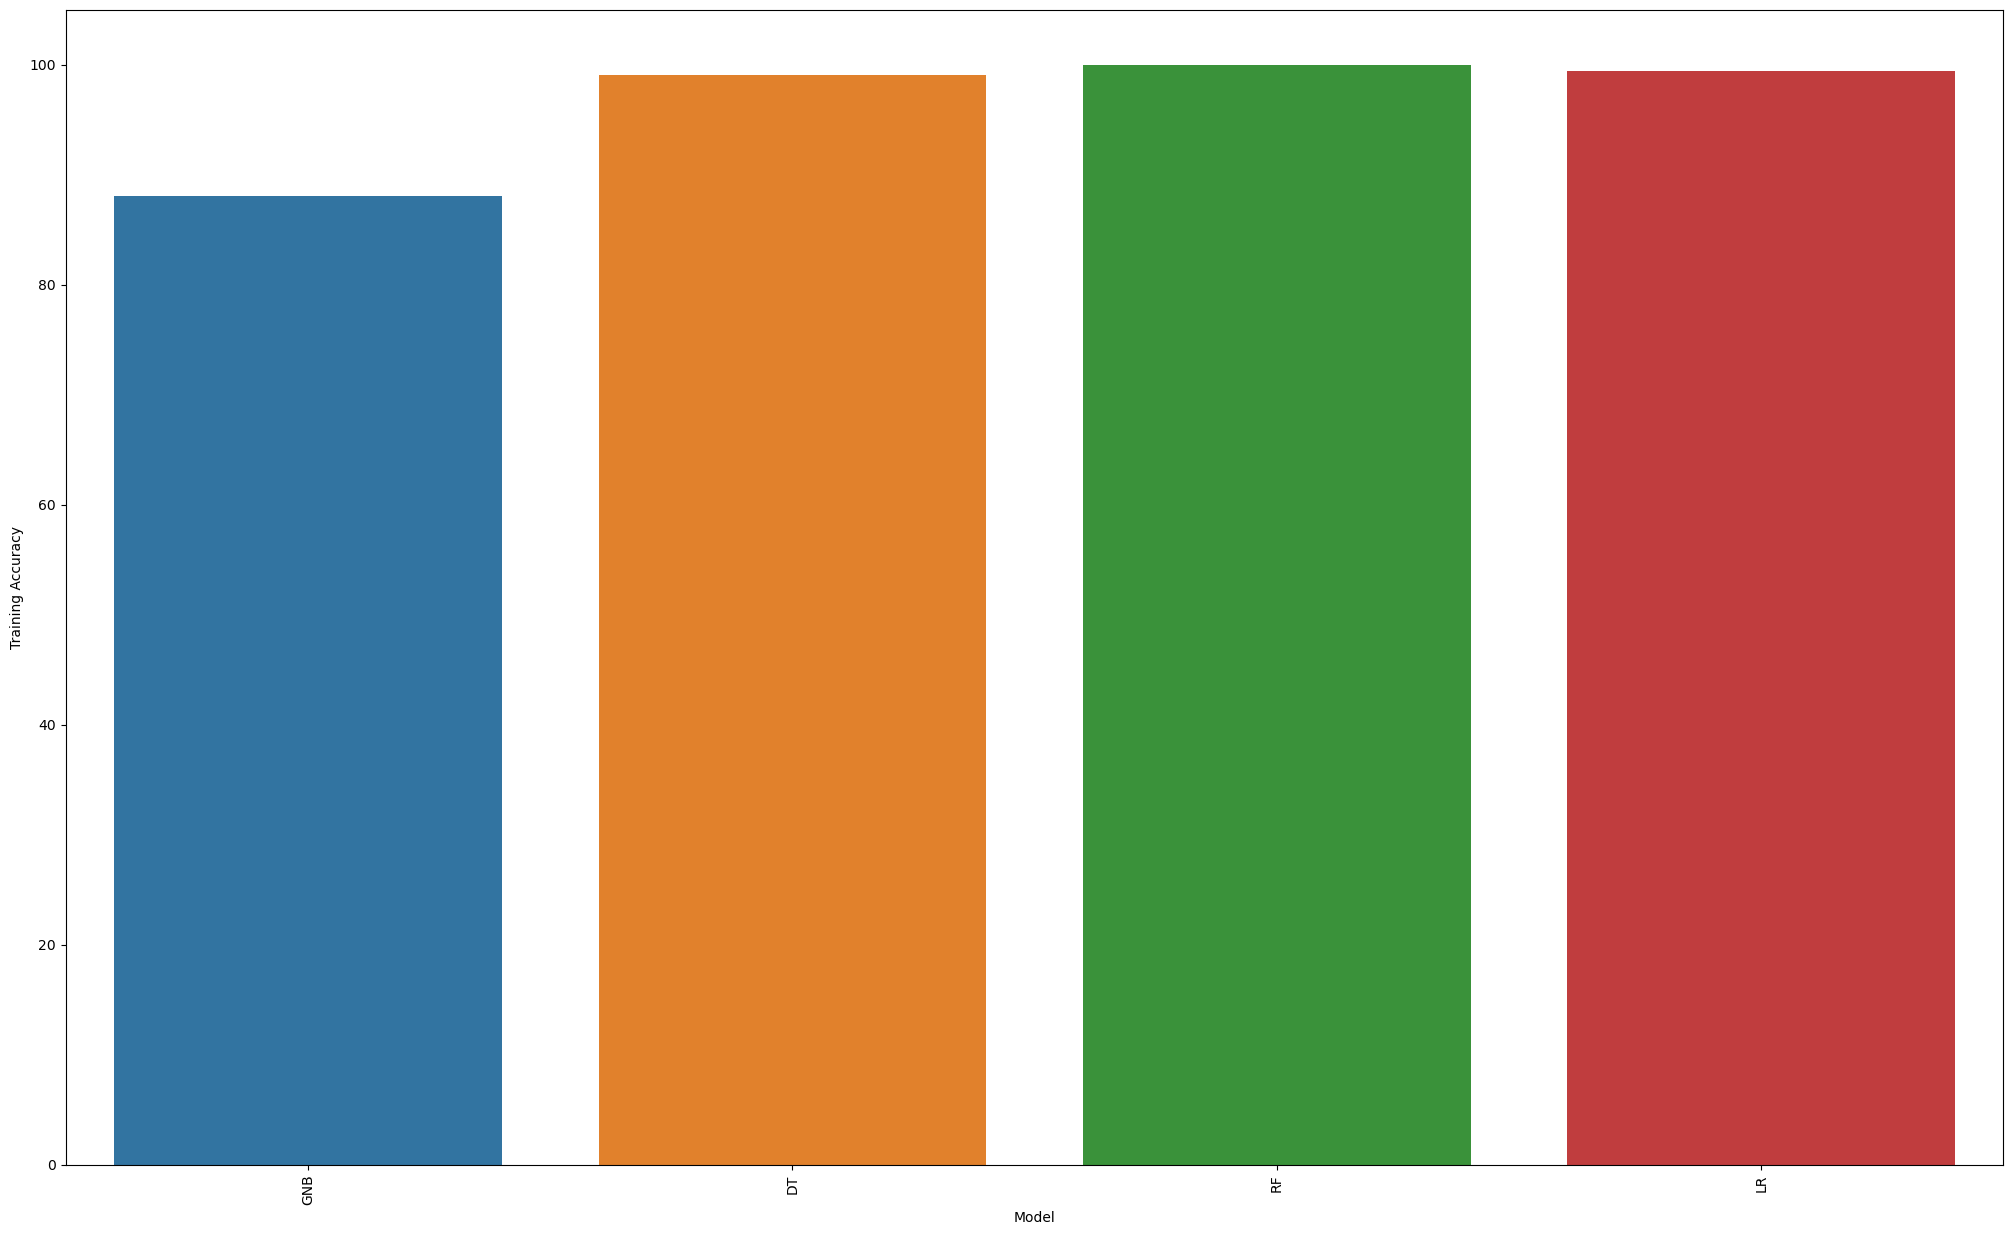

In [105]:
plt.figure(figsize=(25,15))
sns.barplot(x=names, y=values)
plt.xticks(rotation= 90)
plt.xlabel('Model')
plt.ylabel('Training Accuracy')
plt.show()


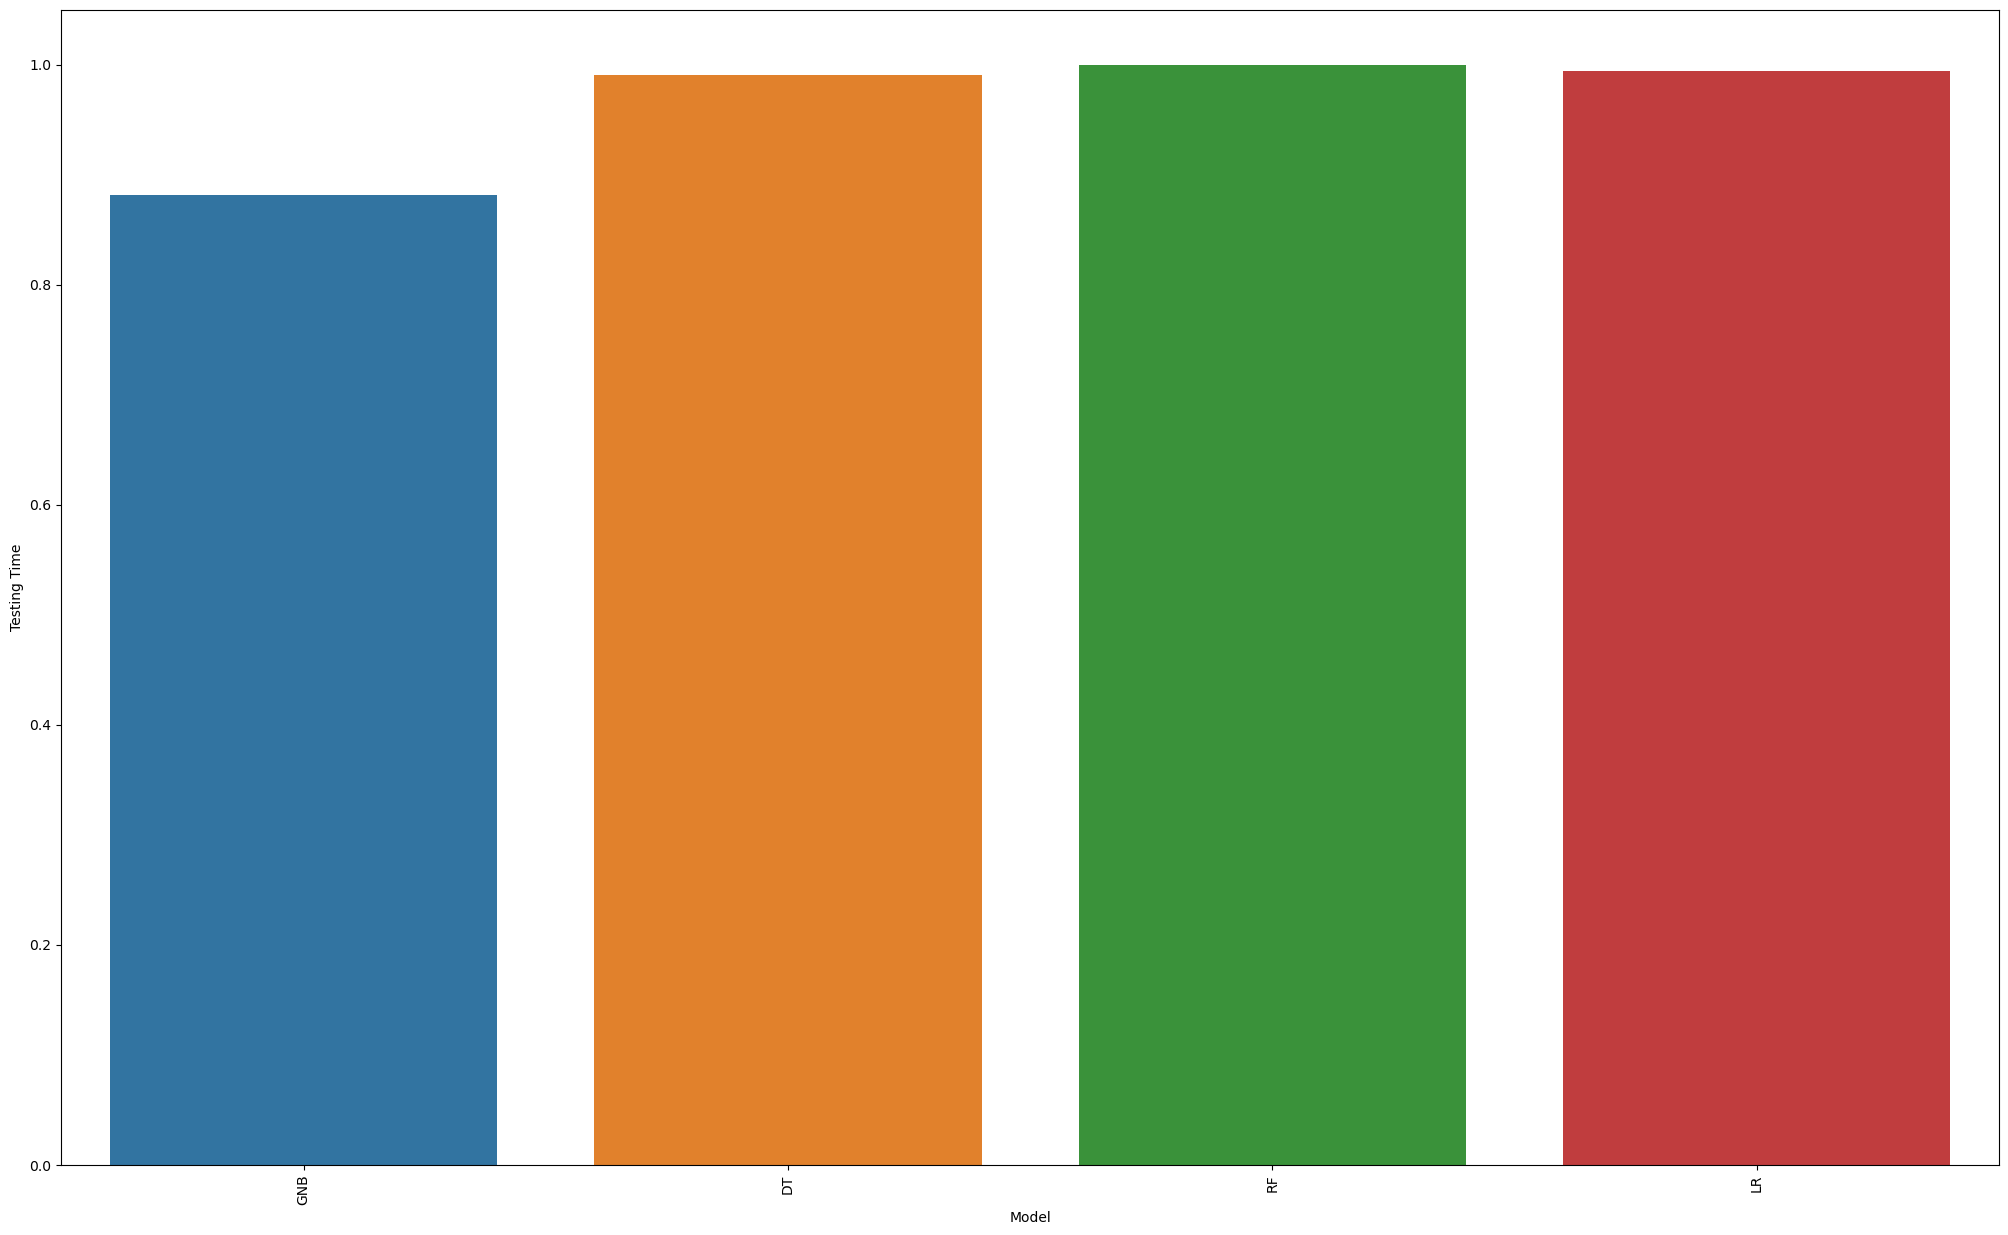

In [117]:
plt.figure(figsize=(25,15))
sns.barplot(x=names, y=values)
plt.xticks(rotation= 90)
plt.xlabel('Model')
plt.ylabel('Testing Time')
plt.show()